In [2]:
#load packages and directory
import scanpy as sc
import seaborn as sns
import numpy as np
import anndata as ad
import scvi
import pandas as pd
import matplotlib.pyplot as plt
import scipy
directory = '/Users/david/Dropbox/RNASeq/VP'

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


## preprocessing, SCVI ##

In [2]:
#load mouse VP
adatavp = sc.read_h5ad('/Users/david/Dropbox/RNASeq/HFD/neurons.h5ad')

In [3]:
#load mouse NAc
adatanac = sc.read_h5ad('/Users/david/Dropbox/RNASeq/Chen2021/neurons.h5ad')

In [4]:
#load rat neurons
adatarat = sc.read_h5ad('/Users/david/Dropbox/RNASeq/Rat/neurons.h5ad')

In [5]:
#load BNST neurons
adatabnst = sc.read_h5ad('/Users/david/Dropbox/RNASeq/BNST/neurons.h5ad')

In [6]:
#load POA neurons
adatapoa = sc.read_h5ad('/Users/david/Dropbox/RNASeq/MPOA/neurons.h5ad')

In [7]:
adatanac.obs['Experiment']='NAC'
adatanac.obs['Species']='Mouse'

In [8]:
adatavp.obs['Experiment']='VP'
adatavp.obs['Species']='Mouse'

In [9]:
adatarat.obs['Experiment']='Rat'
adatarat.obs['Species']='Rat'

In [10]:
adatabnst.obs['Experiment']='BNST'
adatabnst.obs['Species']='Mouse'

In [11]:
adatapoa.obs['Experiment']='POA'
adatapoa.obs['Species']='Mouse'

In [12]:
adata = sc.concat([adatanac,adatavp,adatarat,adatabnst,adatapoa])

In [14]:
adata.obs['Sample']=adata.obs['Experiment'].to_numpy() + ':' + adata.obs['Sample'].to_numpy()

In [ ]:
adata.obs['Region']='NAC'
adata.obs['Region'][adata.obs['Experiment']=='VP']='VP'
adata.obs['Region'][(adata.obs['Experiment']=='Rat') & (adata.obs['Sample'].isin(['Rat:V1','Rat:V2']))]='VP'
adata.obs['Region'][adata.obs['Experiment']=='BNST']='BNST'
adata.obs['Region'][adata.obs['Experiment']=='POA']='POA'

In [15]:
adata.obs['total_counts']=np.sum(adata.layers['counts'],axis=1)

In [16]:
adata.obs

Sample            class  \
AAACCTGAGTGAACGC.NAc_Sample1   NAC:1  09 CNU-LGE GABA   
AACCGCGTCAGCTCTC.NAc_Sample1   NAC:1  09 CNU-LGE GABA   
ACACCCTAGCTGAACG.NAc_Sample1   NAC:1  09 CNU-LGE GABA   
CCGTGGAAGCTACCGC.NAc_Sample1   NAC:1  09 CNU-LGE GABA   
CCTCAGTTCTTCCTTC.NAc_Sample1   NAC:1  09 CNU-LGE GABA   
...                              ...              ...   
CA:TTTGTCAAGGCTACGA-1         POA:CA       12 HY GABA   
CA:TTTGTCAAGTACTTGC-1         POA:CA  11 CNU-HYa GABA   
CA:TTTGTCACAAGCCTAT-1         POA:CA       14 HY Glut   
CA:TTTGTCACATTACCTT-1         POA:CA  11 CNU-HYa GABA   
CA:TTTGTCATCAGTACGT-1         POA:CA  13 CNU-HYa Glut   

                                                 subclass  \
AAACCTGAGTGAACGC.NAc_Sample1              062 STR D2 Gaba   
AACCGCGTCAGCTCTC.NAc_Sample1              062 STR D2 Gaba   
ACACCCTAGCTGAACG.NAc_Sample1              062 STR D2 Gaba   
CCGTGGAAGCTACCGC.NAc_Sample1              062 STR D2 Gaba   
CCTCAGTTCTTCCTTC.NAc_Sample1              062 STR D2 Gaba   
...                                                   ...   
CA:TTTGTCAAGGCTACGA-1         106 PVpo-VMPO-MPN Hmx2 Gaba   
CA:TTTGTCAAGTACTTGC-1                   088 BST Tac2 Gaba   
CA:TTTGTCACAAGCCTAT-1          124 MPN-MPO-PVpo Hmx2 Glut   
CA:TTTGTCACATTACCTT-1               086 MPO-ADP Lhx8 Gaba   
CA:TTTGTCATCAGTACGT-1         116 AVPV-MEPO-SFO Tbr1 Glut   

                                                   supertype  \
AAACCTGAGTGAACGC.NAc_Sample1              0279 STR D2 Gaba_6   
AACCGCGTCAGCTCTC.NAc_Sample1              0279 STR D2 Gaba_6   
ACACCCTAGCTGAACG.NAc_Sample1              0279 STR D2 Gaba_6   
CCGTGGAAGCTACCGC.NAc_Sample1              0279 STR D2 Gaba_6   
CCTCAGTTCTTCCTTC.NAc_Sample1              0279 STR D2 Gaba_6   
...                                                      ...   
CA:TTTGTCAAGGCTACGA-1         0483 PVpo-VMPO-MPN Hmx2 Gaba_2   
CA:TTTGTCAAGTACTTGC-1                   0409 BST Tac2 Gaba_1   
CA:TTTGTCACAAGCCTAT-1          0551 MPN-MPO-PVpo Hmx2 Glut_6   
CA:TTTGTCACATTACCTT-1               0406 MPO-ADP Lhx8 Gaba_5   
CA:TTTGTCATCAGTACGT-1         0522 AVPV-MEPO-SFO Tbr1 Glut_4   

                                                     cluster Experiment  \
AAACCTGAGTGAACGC.NAc_Sample1              0986 STR D2 Gaba_6        NAC   
AACCGCGTCAGCTCTC.NAc_Sample1              0986 STR D2 Gaba_6        NAC   
ACACCCTAGCTGAACG.NAc_Sample1              0986 STR D2 Gaba_6        NAC   
CCGTGGAAGCTACCGC.NAc_Sample1              0986 STR D2 Gaba_6        NAC   
CCTCAGTTCTTCCTTC.NAc_Sample1              0986 STR D2 Gaba_6        NAC   
...                                                      ...        ...   
CA:TTTGTCAAGGCTACGA-1         1888 PVpo-VMPO-MPN Hmx2 Gaba_2        POA   
CA:TTTGTCAAGTACTTGC-1                   1498 BST Tac2 Gaba_1        POA   
CA:TTTGTCACAAGCCTAT-1          2260 MPN-MPO-PVpo Hmx2 Glut_6        POA   
CA:TTTGTCACATTACCTT-1               1482 MPO-ADP Lhx8 Gaba_5        POA   
CA:TTTGTCATCAGTACGT-1         2094 AVPV-MEPO-SFO Tbr1 Glut_4        POA   

                             Species  total_counts  
AAACCTGAGTGAACGC.NAc_Sample1   Mouse        3281.0  
AACCGCGTCAGCTCTC.NAc_Sample1   Mouse        5257.0  
ACACCCTAGCTGAACG.NAc_Sample1   Mouse        4007.0  
CCGTGGAAGCTACCGC.NAc_Sample1   Mouse        4953.0  
CCTCAGTTCTTCCTTC.NAc_Sample1   Mouse        5163.0  
...                              ...           ...  
CA:TTTGTCAAGGCTACGA-1          Mouse        4842.0  
CA:TTTGTCAAGTACTTGC-1          Mouse        1202.0  
CA:TTTGTCACAAGCCTAT-1          Mouse        4468.0  
CA:TTTGTCACATTACCTT-1          Mouse         948.0  
CA:TTTGTCATCAGTACGT-1          Mouse        5334.0  

[73102 rows x 8 columns]

In [17]:
del(adatavp,adatarat,adatanac,adatabnst,adatapoa)

In [18]:
adata_scvi = adata.copy()

In [19]:
sc.pp.highly_variable_genes(adata_scvi, n_top_genes = 2000, subset = True, layer='counts', flavor = 'seurat_v3', batch_key='Sample')

In [20]:
scvi.model.SCVI.setup_anndata(adata_scvi, layer = 'counts',
                             batch_key='Sample',
                             continuous_covariate_keys=['total_counts'],
                             categorical_covariate_keys=['Experiment','Species'])

#suggested settings for integrating multiple datasets
model = scvi.model.SCVI(adata_scvi, n_layers=2, n_latent=30, gene_likelihood="nb")

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


In [21]:
model.train() #may take a while without GPU

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/109:   0%|                                      | 0/109 [00:00<?, ?it/s]

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


Epoch 109/109: 100%|█| 109/109 [14:23<00:00,  7.73s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=109` reached.


Epoch 109/109: 100%|█| 109/109 [14:23<00:00,  7.92s/it, v_num=1, train_loss_step


In [22]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [31]:
sc.pp.neighbors(adata, use_rep = 'X_scVI', method = 'umap', n_neighbors=50)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


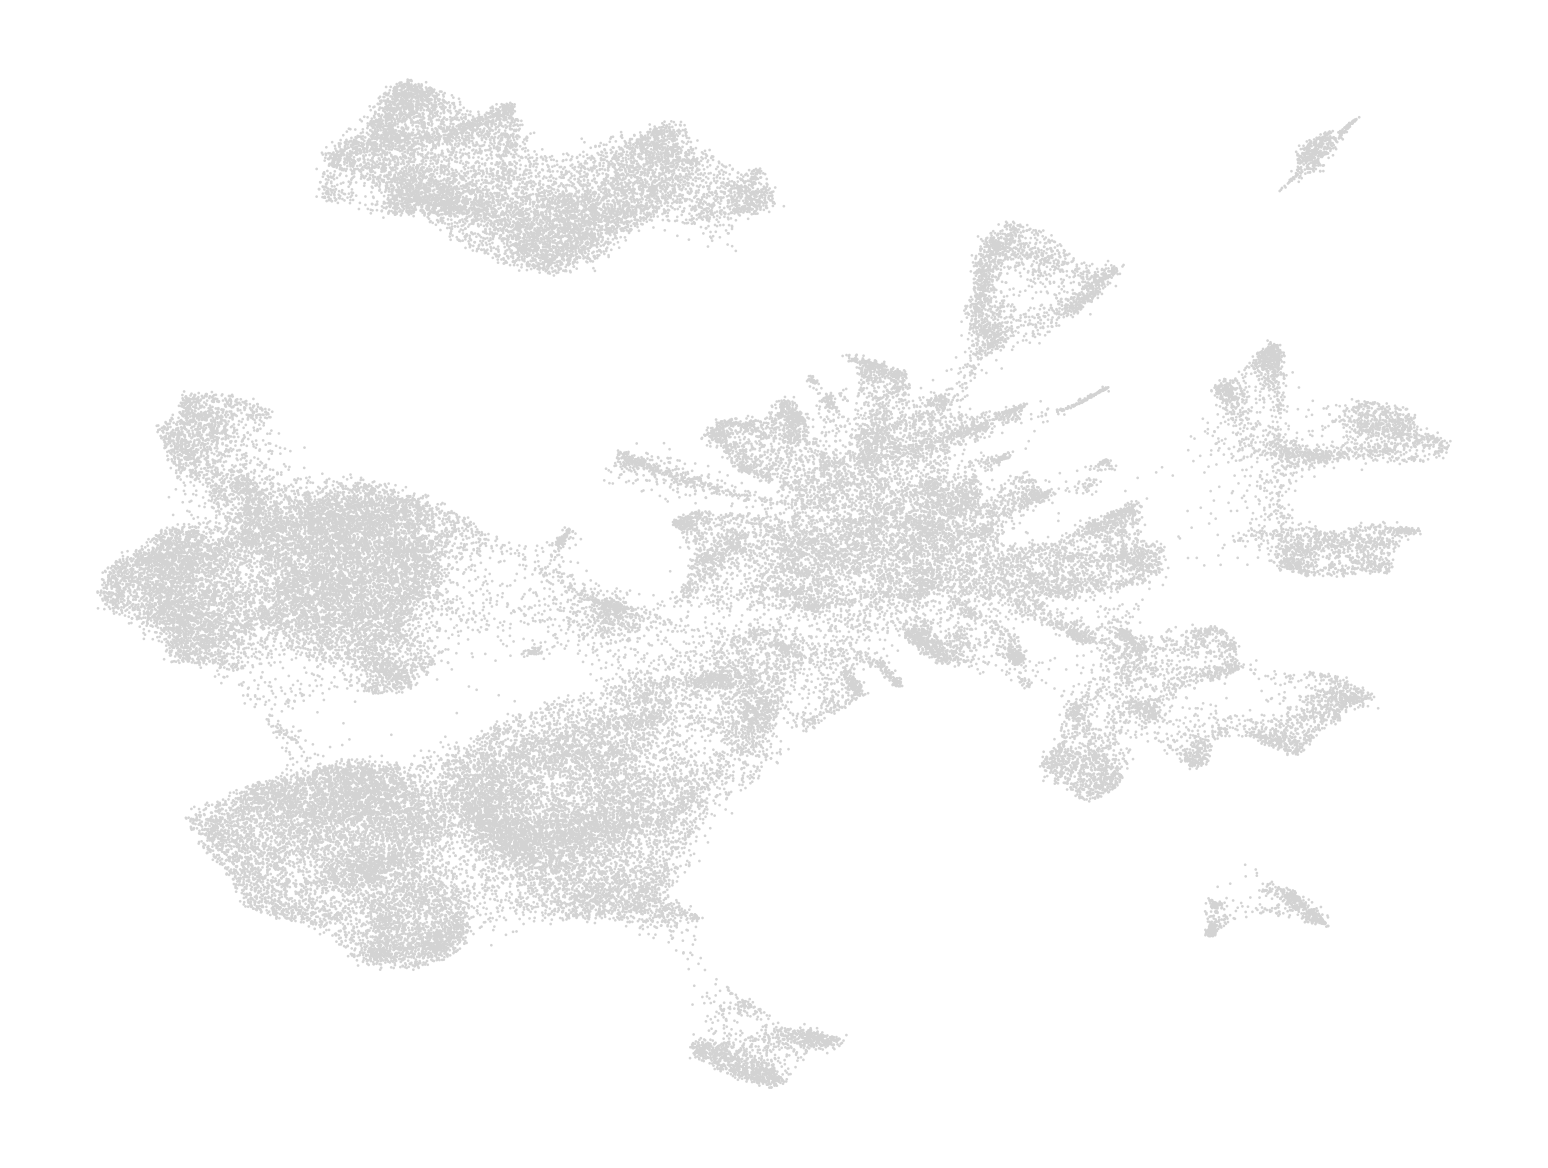

In [45]:
sc.tl.umap(adata, min_dist=0.4)
sc.pl.umap(adata, frameon = False)

In [60]:
adata.write_h5ad(directory + '/AllNeurons.h5ad')

In [38]:
del(adata_scvi)

## analysis

In [3]:
adata = sc.read_h5ad(directory + '/AllNeurons.h5ad')

In [39]:
plt.rcParams['figure.dpi'] = 300

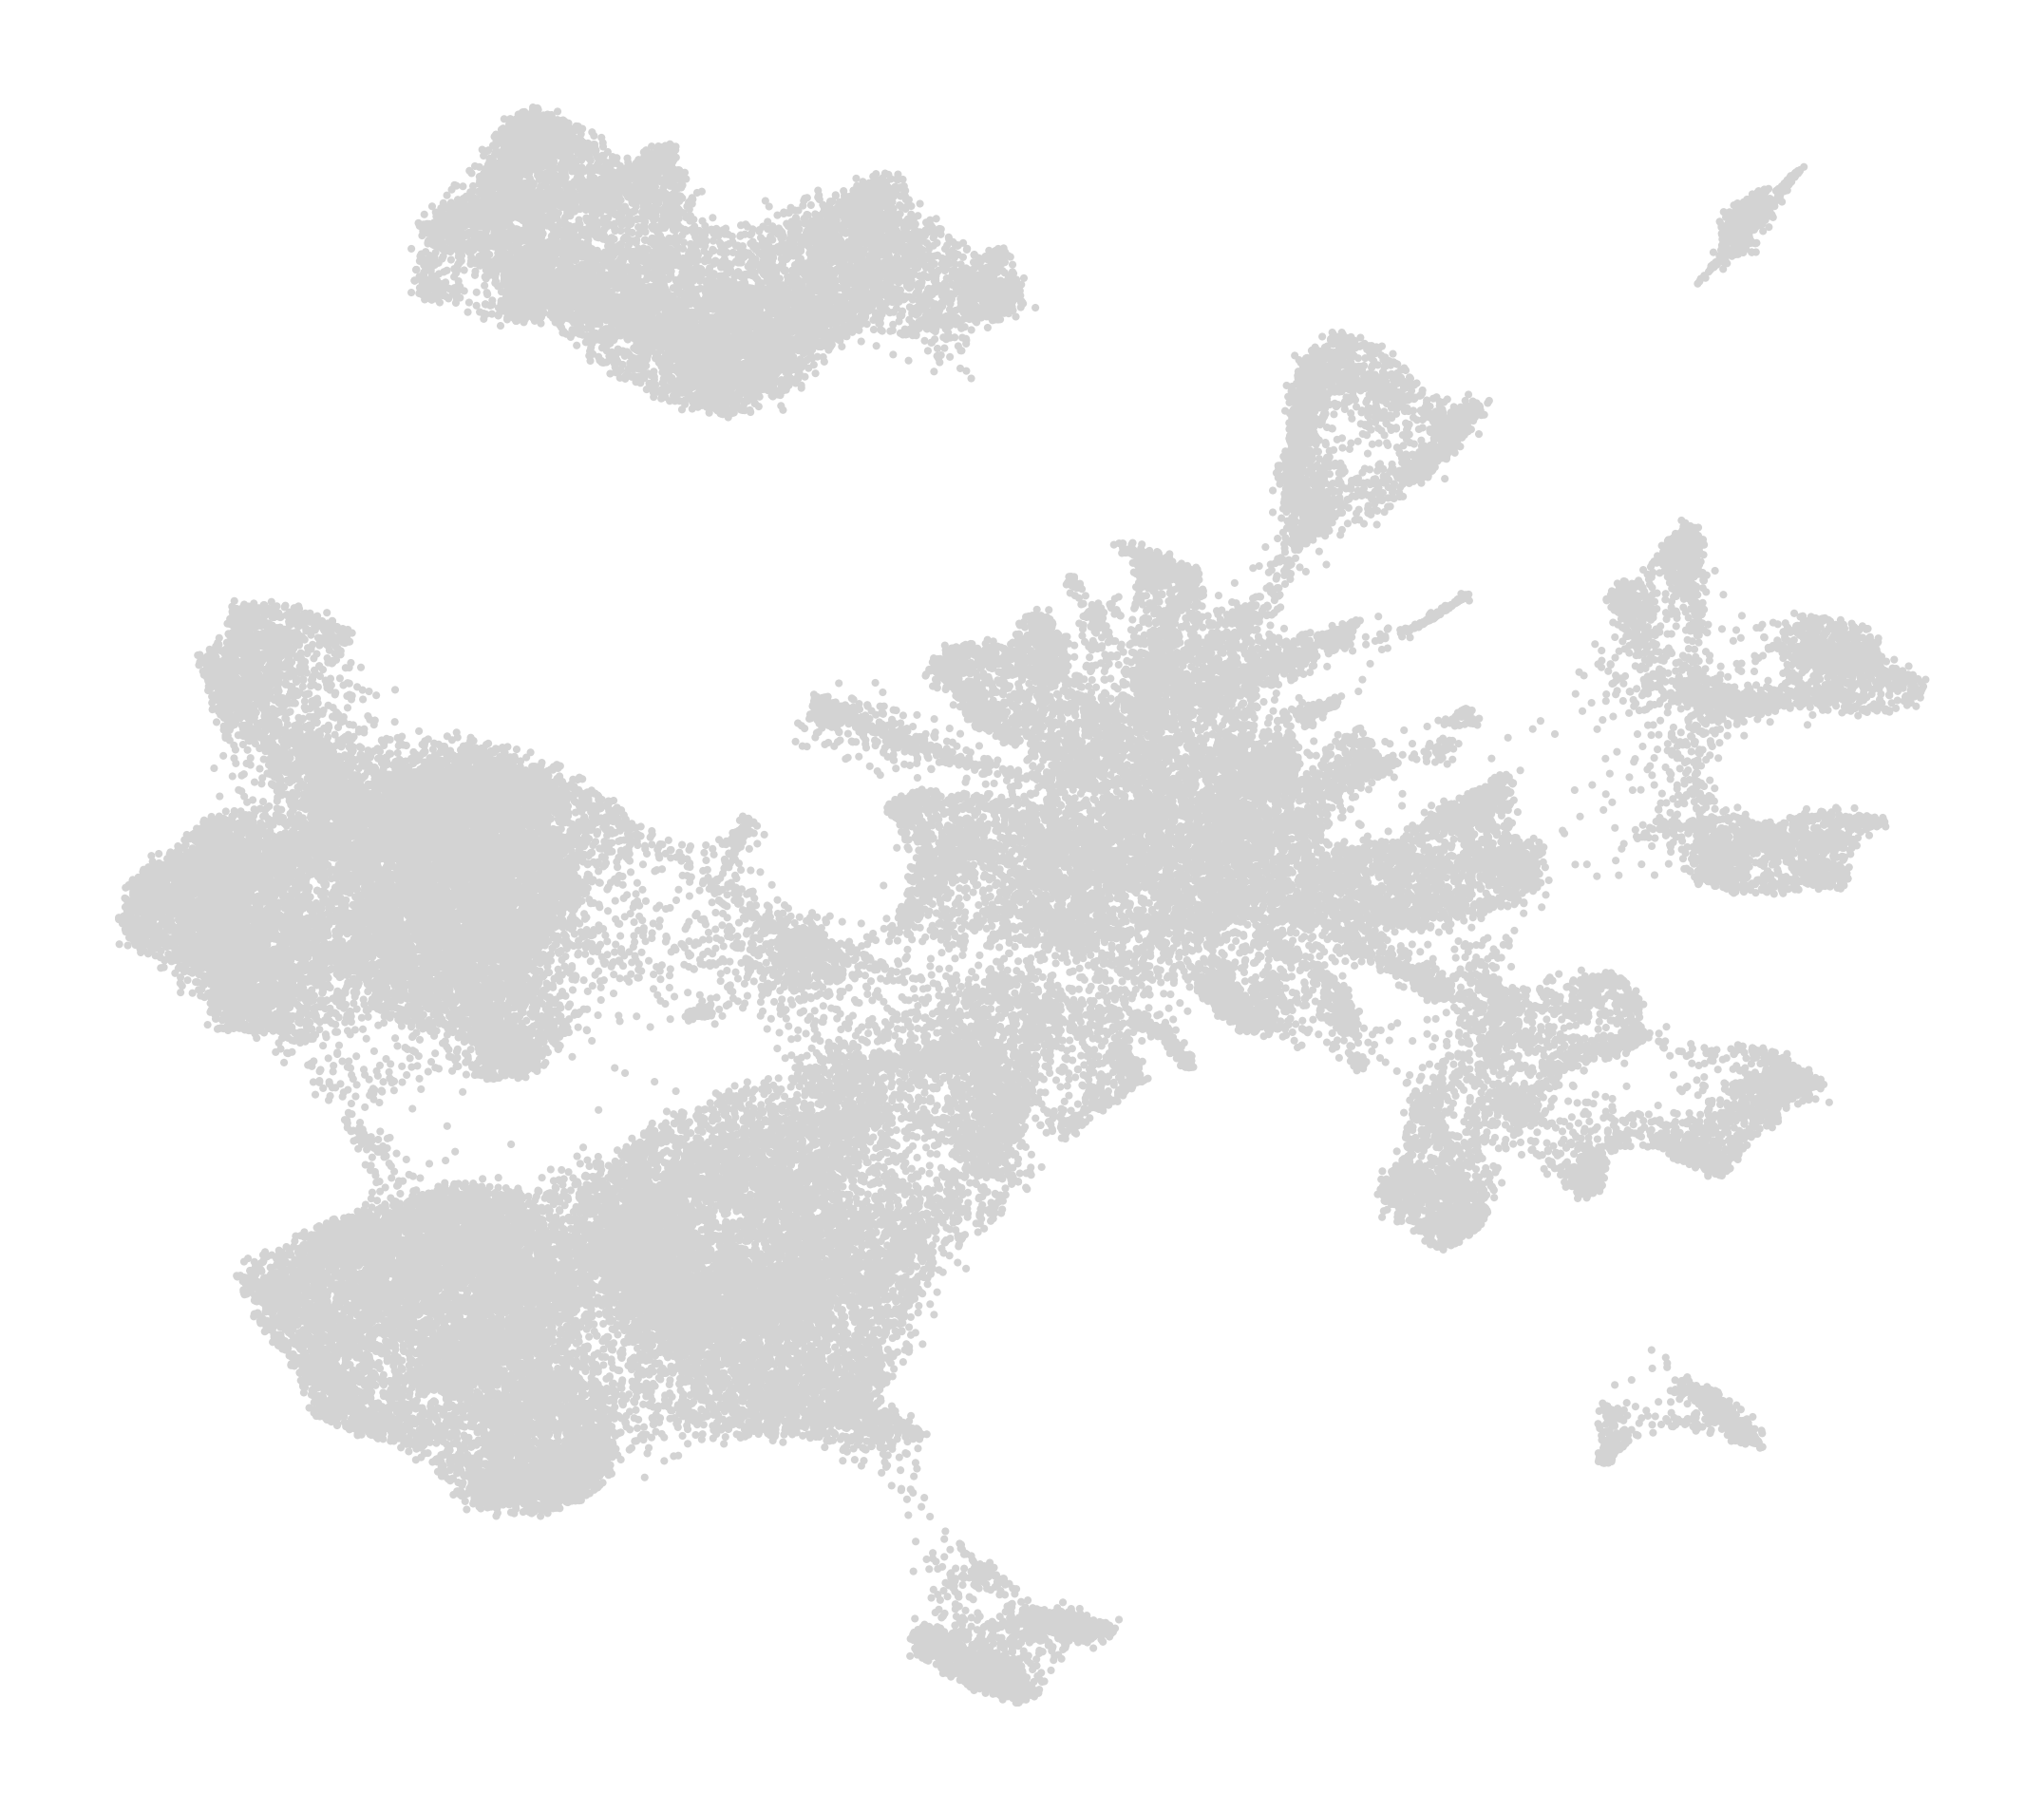

In [47]:
plt.figure(figsize=(9,8))
ax=plt.subplot(1,1,1)
sc.pl.umap(adata, size = 15, frameon = False, legend_loc='None', ax=ax, show=True)

In [11]:
#get color palettes
allMeta = pd.read_csv('/Users/david/Dropbox/RNASeq/AllenPAL/Data/cell_metadata_with_cluster_annotation.csv')

(classes,ci) = np.unique(allMeta['class'].to_numpy(),return_index=True)
cc = allMeta['class_color'].to_numpy()[ci]
classp = dict(zip(classes,cc))
classp['None']=(0.8,0.8,0.8,0.2)

(subclasses,si) = np.unique(allMeta['subclass'].to_numpy(),return_index=True)
scc = allMeta['subclass_color'].to_numpy()[si]
subclassp = dict(zip(subclasses,scc))
subclassp['None']=(0.8,0.8,0.8,0.2)

ntlist=allMeta['neurotransmitter'][allMeta['neurotransmitter']==allMeta['neurotransmitter']].to_numpy()
ntclist=allMeta['neurotransmitter_color'][allMeta['neurotransmitter']==allMeta['neurotransmitter']].to_numpy()
(neurotransmitters,ni) = np.unique(ntlist,return_index=True)
nc = ntclist[ni]
neurotransmitterp = dict(zip(neurotransmitters,nc))
neurotransmitterp['None']=(0.8,0.8,0.8,0.2)

del(allMeta)

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_55465/3778227727.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  allMeta = pd.read_csv('/Users/david/Dropbox/RNASeq/AllenPAL/Data/cell_metadata_with_cluster_annotation.csv')


/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


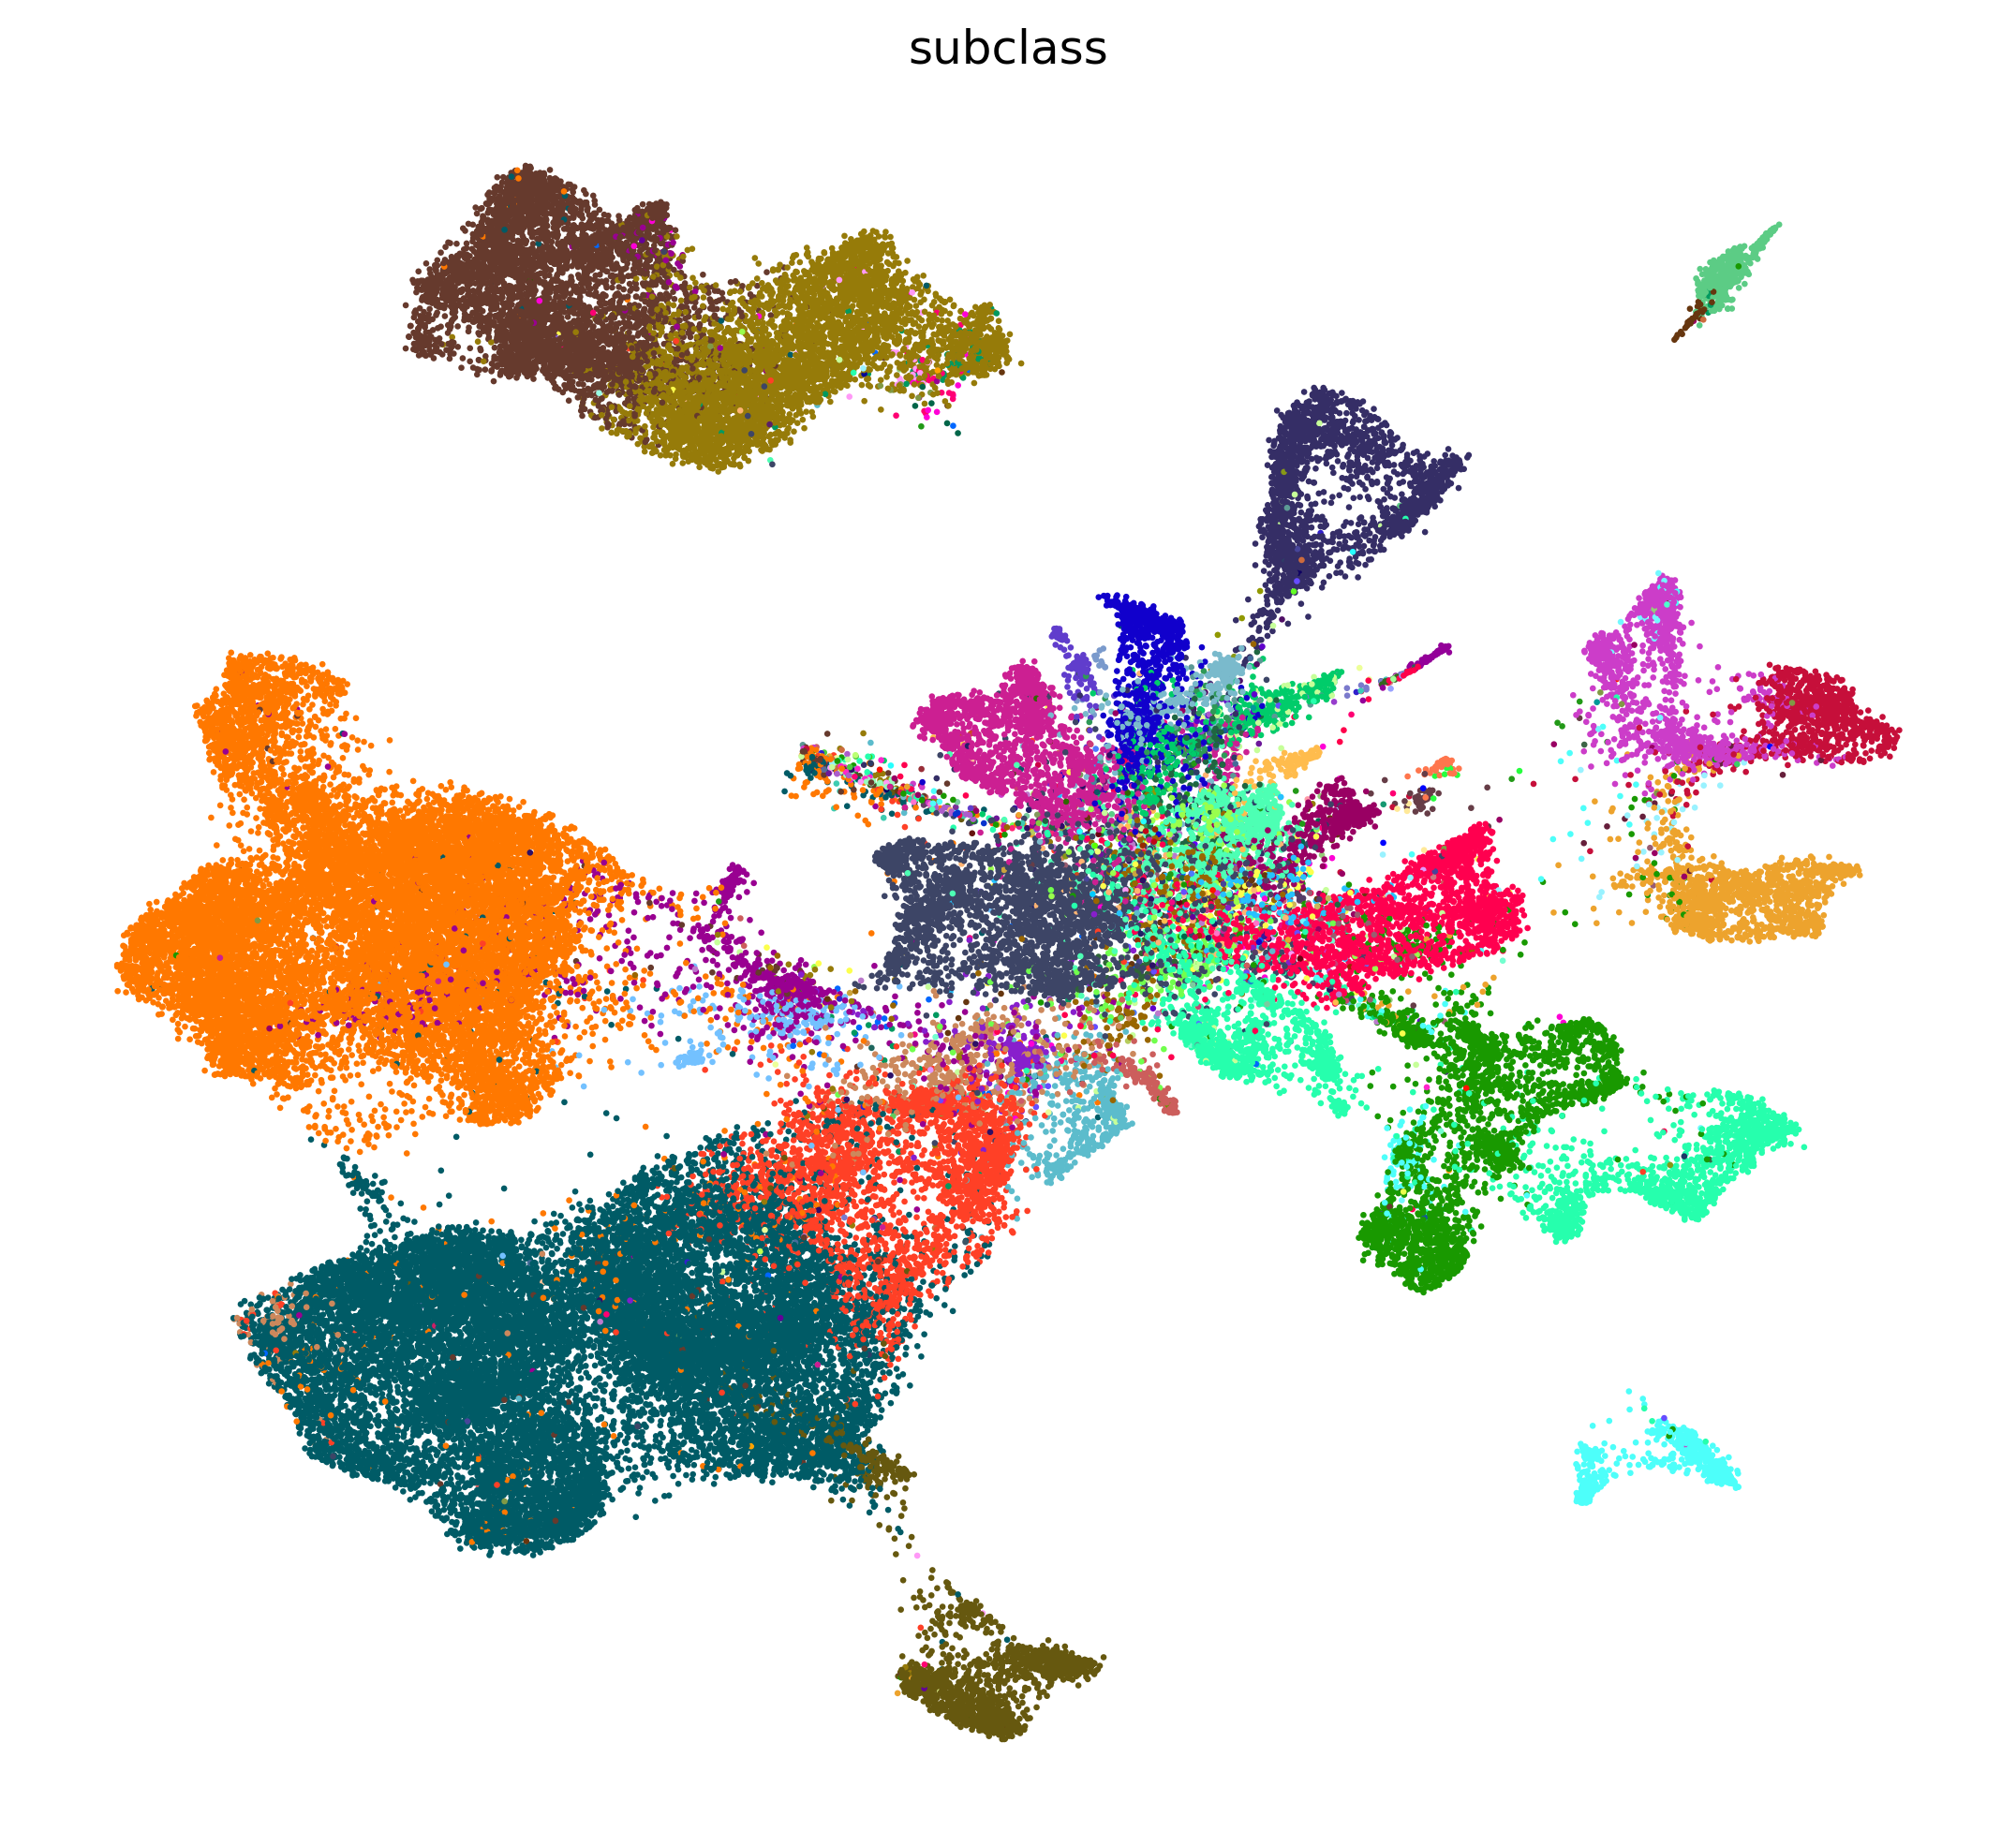

In [49]:
subclasses = np.unique(adata.obs['subclass'])
groups = subclasses[subclasses!='None']

plt.figure(figsize=(9,8))
ax=plt.subplot(1,1,1)
#sc.pl.umap(adata, color = ['Experiment'], size = 4, frameon = False, palette=excolors)
sc.pl.umap(adata, color = ['subclass'], groups = groups.tolist(), size = 10, frameon = False, palette=subclassp, legend_loc='None', ax=ax, show=False)
plt.savefig(directory + '/Figures/allenSubclass.png')

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


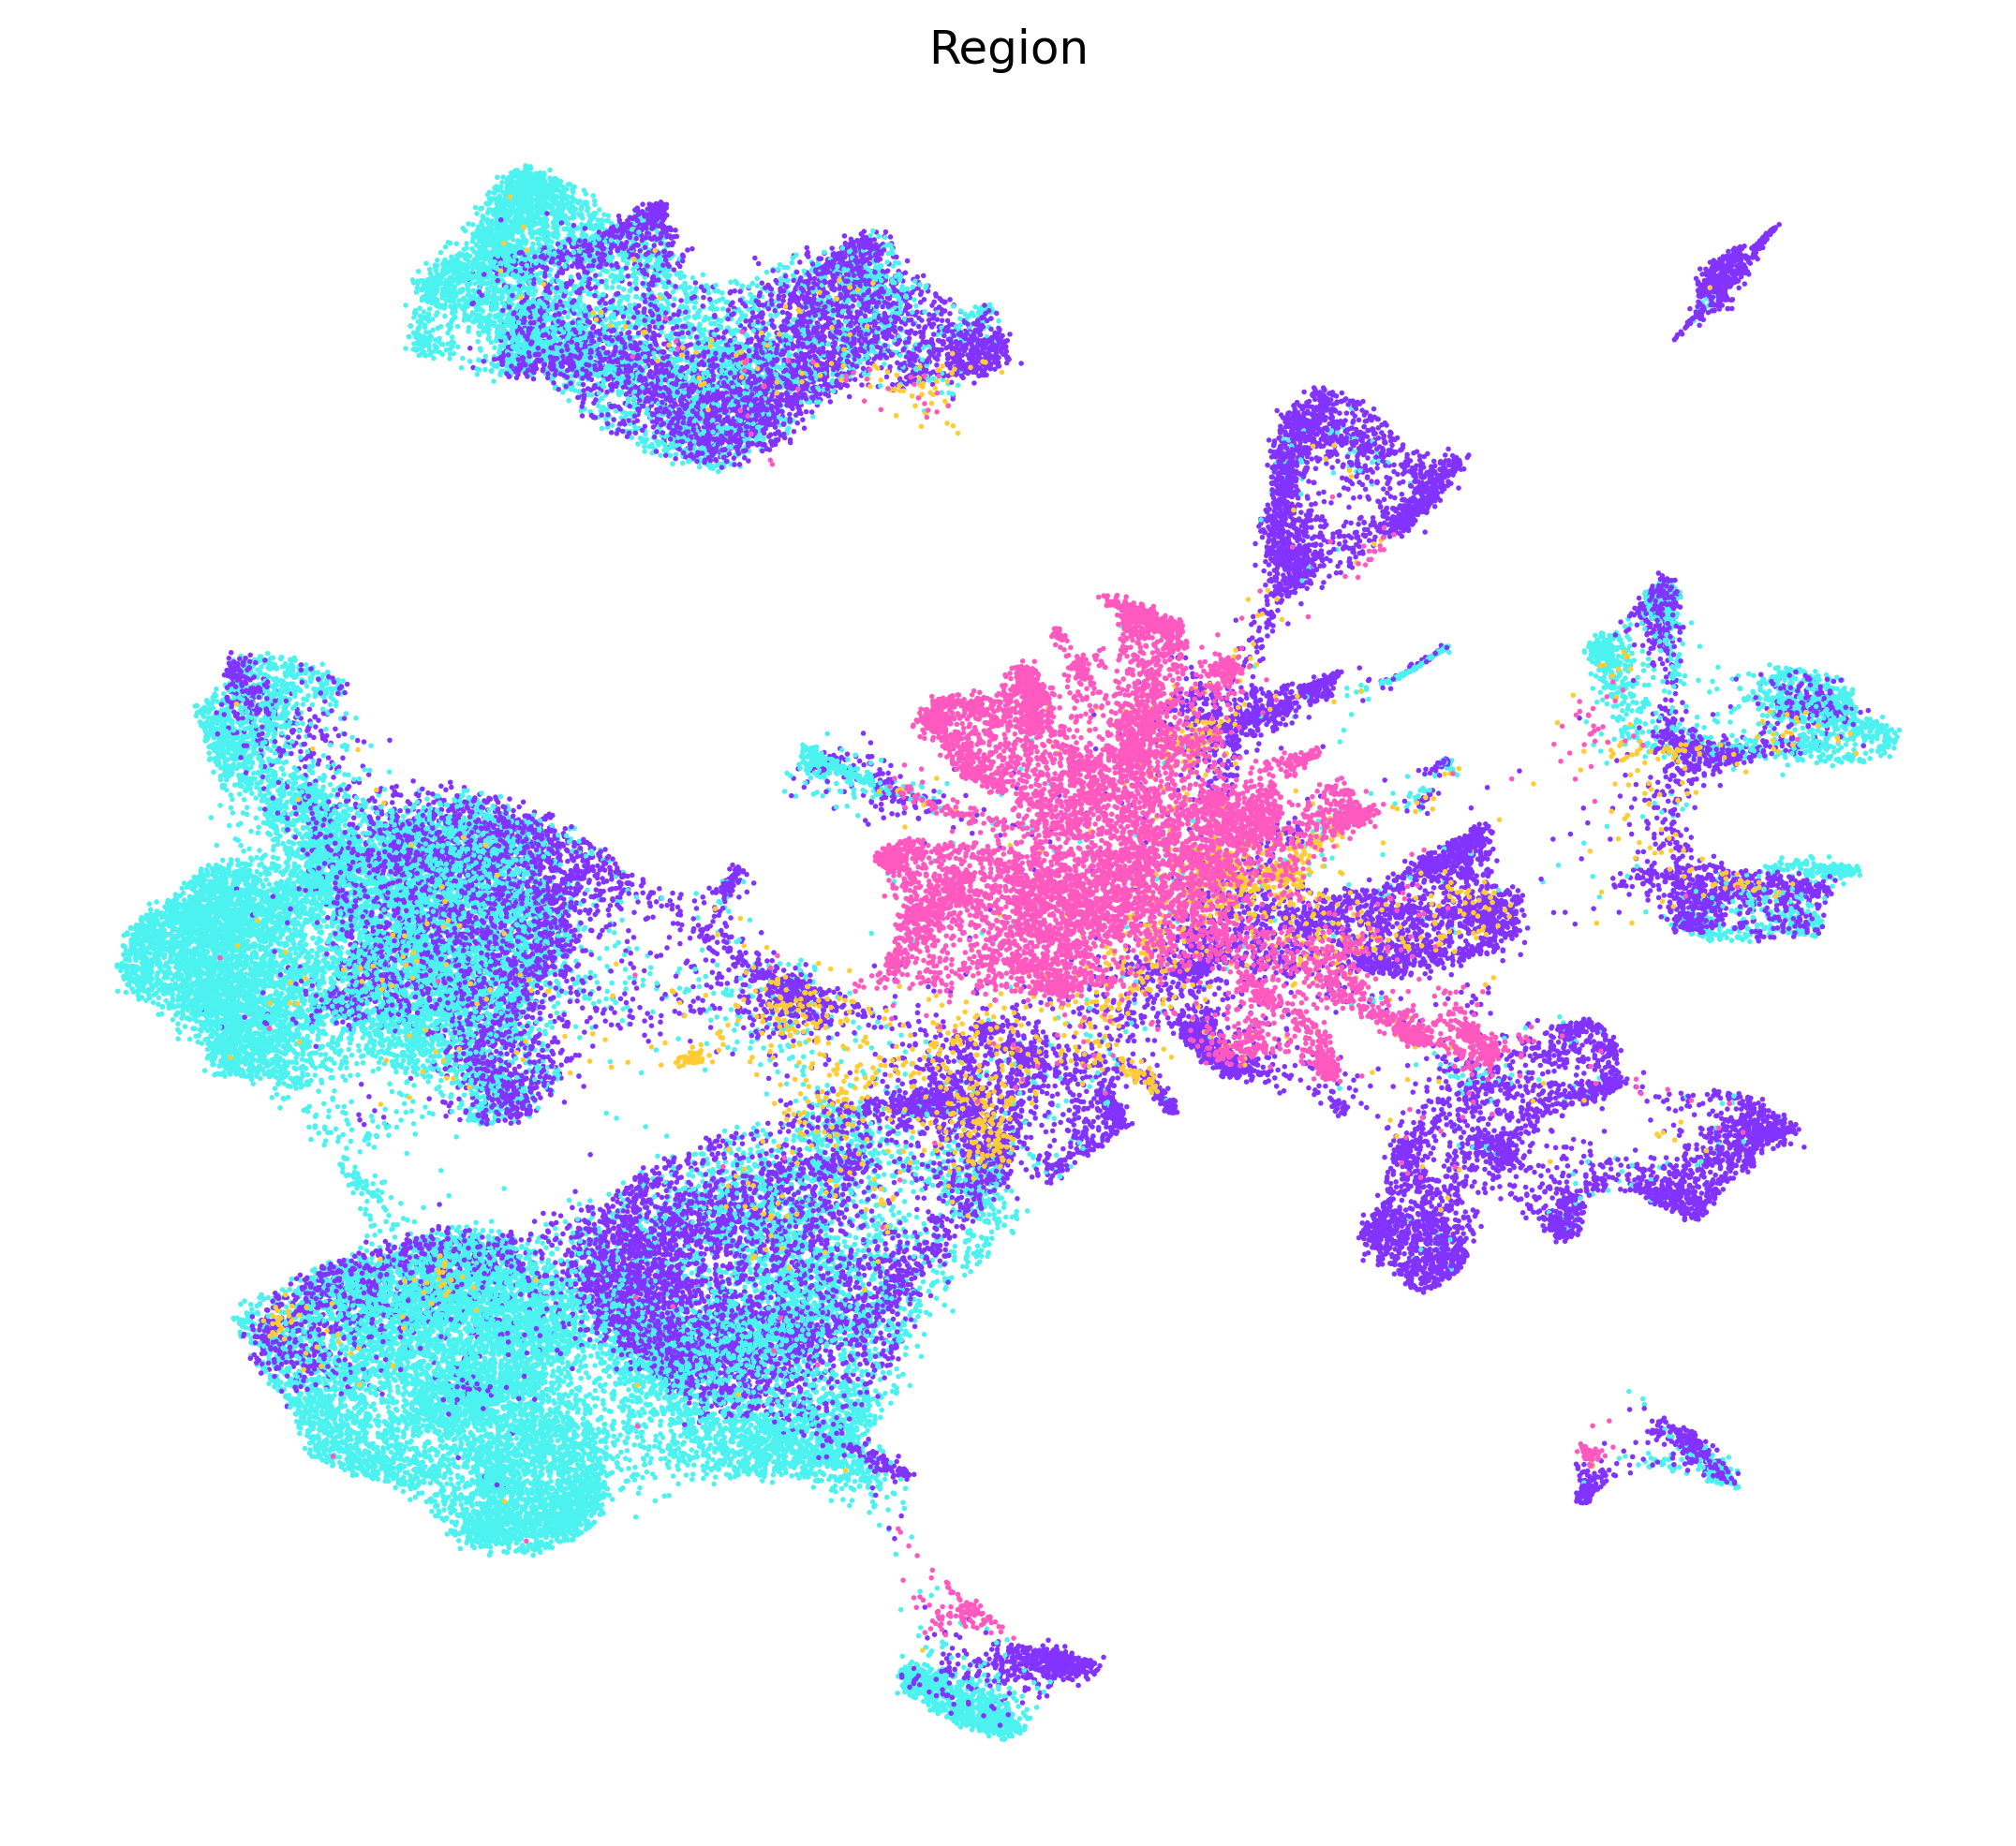

In [70]:
plt.figure(figsize=(9,8))
ax=plt.subplot(1,1,1)

#rscolors = {'NAC-M':(0.3, 0.95, 0.94,1),'NAC-R':(0.15,0.7,0.6,1),'VP-M':(0.51, 0.2, 1, 1),'VP-R':(0.2, 0.1, 0.6, 1),'PAL-M':(0.8, 0.8, 0.8, 1)}
rscolors = {'NAC':(0.3, 0.95, 0.94,1),'PAL':(0.8,0.8,0.8,1),'VP':(0.51, 0.2, 1, 1),'BNST':(1,0.8,0.2),'POA':(1,0.35,0.75)}

sc.pl.umap(adata, color = ['Region'], size = 7, frameon = False, palette=rscolors, legend_loc='None', ax=ax, show=False)
plt.savefig(directory + '/Figures/neuronsReg.png')

In [36]:
#custom region order
maingroups = [
          '054','055','056','057','058','059',
            '060','061','062','063',
          '064','078',
          '080','081','082','084','085',
          '086','088','118','119'
         ]

extra = np.unique(adata.obs['subclass'].astype('U3'))
extra = extra[~np.isin(extra,maingroups)]
groups = np.concatenate((maingroups,extra))
grouporder = np.argsort(np.argsort(groups))

#numerical order
grouporder = np.arange(len(np.unique(adata.obs['subclass'].astype('U3'))))

groupnames = np.unique(adata.obs['subclass'])
groupnames = groupnames[grouporder]


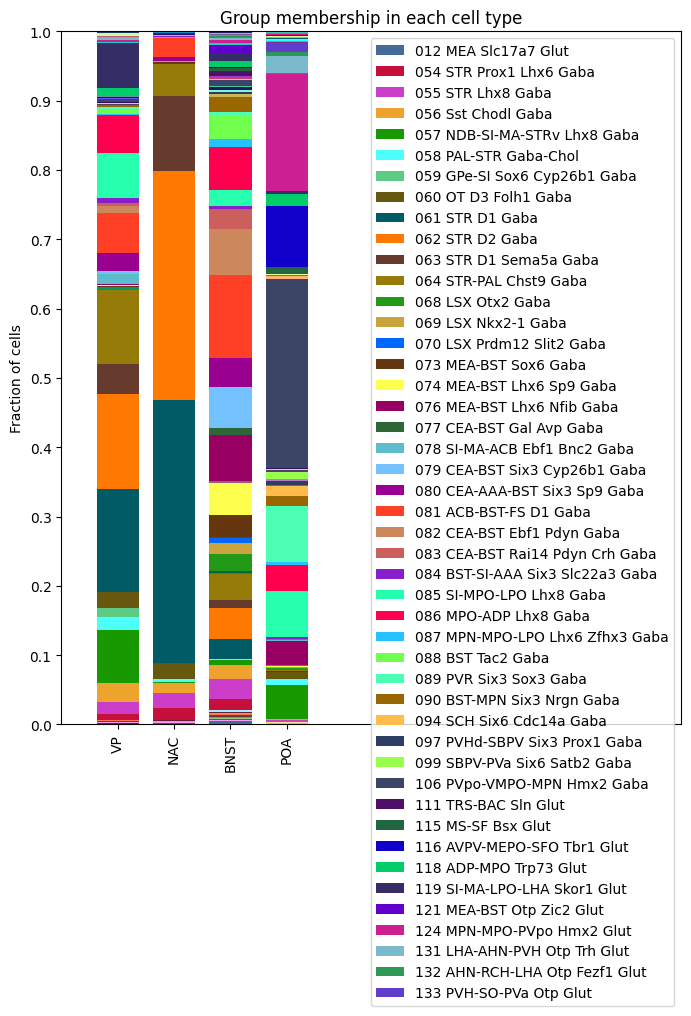

In [38]:
#plot subclasses in each region
order = ['VP','NAC','BNST','POA']

typecount=np.zeros((len(groups),len(order)))
for g in range(0,len(groups)):   
    for t in range(0,len(order)):
        typecount[g,t]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass']==groupnames[g]))                   

tcn = np.divide(typecount,np.sum(typecount,axis=0))

width = 0.75

fig, ax = plt.subplots(figsize = (8,9))
bottom = np.zeros(len(order))

lhs=[]
inc=np.full((len(groups),1),False,dtype='bool')
inccolors=[]
for g in range(0,len(groups)):
    p = ax.bar(order, tcn[g,:], width, label=groupnames[g], bottom=bottom, color=subclassp[groupnames[g]])
    bottom += tcn[g,:]
    if np.max(tcn[g,0:5])>=0.005:
        lhs.append(p)
        inc[g]=True
        inccolors.append(subclassp[groupnames[g]])
inc=inc.squeeze()

ax.legend(handles=lhs,loc="upper right", ncols=1)

plt.title('Group membership in each cell type')
plt.xlim((-1,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Fraction of cells')
plt.savefig(directory + '/Figures/expSubclass.svg')

In [9]:
#custom region order
maingroups = [
          '055','056','057','058','059',
          '064','078',
          '080','081','082','084','085',
          '086','088','118','119'
         ]
maingroups = np.flip(maingroups)

extra = np.unique(adata.obs['subclass'].astype('U3'))
extra = extra[~np.isin(extra,maingroups)]
groups = np.concatenate((maingroups,extra))
grouporder = np.argsort(np.argsort(groups))

groupnames = np.unique(adata.obs['subclass'])
groupnames = groupnames[grouporder]


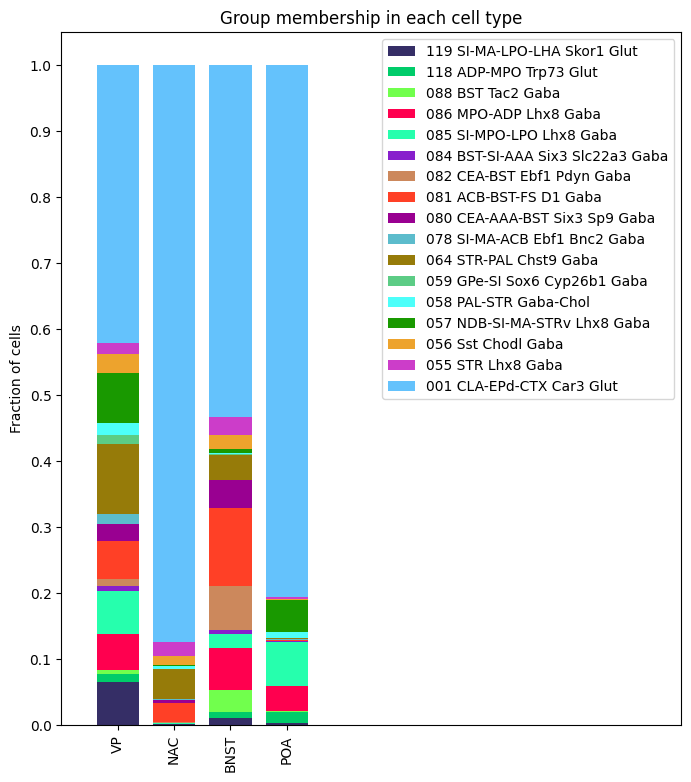

In [12]:
#plot VP subclasses in all regions
order = ['VP','NAC','BNST','POA']

typecount=np.zeros((len(maingroups)+1,len(order)))
for t in range(0,len(order)):
    for g in range(0,len(maingroups)):      
        typecount[g,t]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass']==groupnames[g]))
    typecount[g+1,t]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass'].isin(groupnames[g+1:])))

tcn = np.divide(typecount,np.sum(typecount,axis=0))

width = 0.75

fig, ax = plt.subplots(figsize = (8,9))
bottom = np.zeros(len(order))

lhs=[]
inc=np.full((len(maingroups)+1,1),False,dtype='bool')
inccolors=[]
for g in range(0,len(maingroups)+1):
    p = ax.bar(order, tcn[g,:], width, label=groupnames[g], bottom=bottom, color=subclassp[groupnames[g]])
    bottom += tcn[g,:]
    if np.max(tcn[g,0:5])>=0.005:
        lhs.append(p)
        inc[g]=True
        inccolors.append(subclassp[groupnames[g]])
inc=inc.squeeze()

ax.legend(handles=lhs,loc="upper right", ncols=1)

plt.title('Group membership in each cell type')
plt.xlim((-1,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Fraction of cells')
plt.savefig(directory + '/Figures/regionIncSubclass.svg')

In [16]:
#fraction in VP neurons
1-tcn[-1,:]

array([0.57917132, 0.12650172, 0.46694215, 0.19414704])

In [17]:
maingroups = [
          '055','056','057','058','059',
          '064','078',
          '080','081','082','084','085',
          '086','088','118','119'
         ]

rscolors = {'NAC':(0.3, 0.95, 0.94,1),'PAL':(0.8,0.8,0.8,1),'VP':(0.51, 0.2, 1, 1),'BNST':(1,0.8,0.2),'POA':(1,0.35,0.75)}


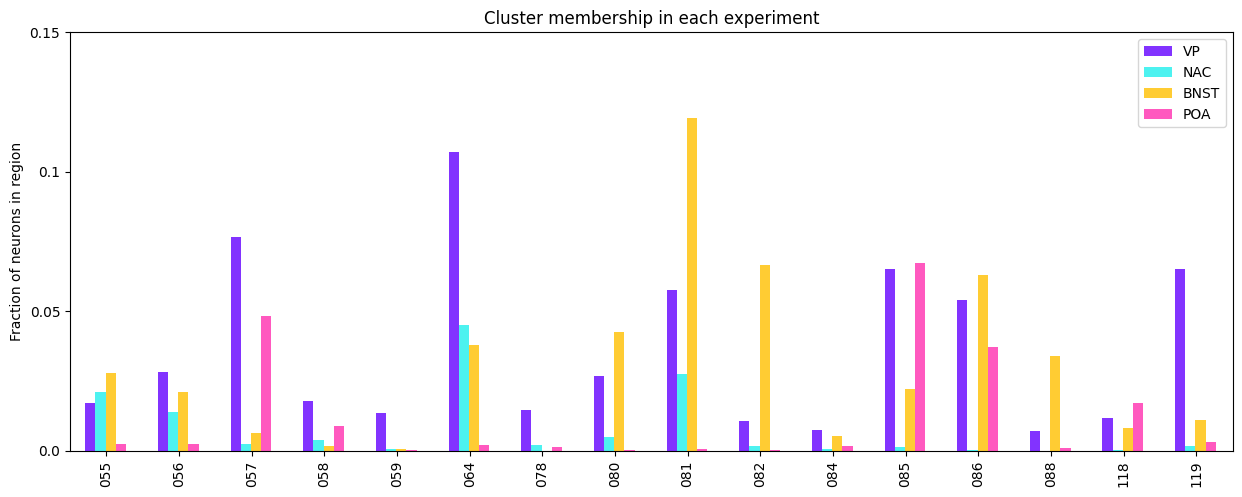

In [19]:
#plot proportions across regions
typecount=np.zeros((len(order),len(maingroups)))
totals=np.zeros(len(order))
for t in range(0,len(order)):
    totals[t]=np.sum(adata.obs['Region']==order[t])
    for g in range(0,len(maingroups)):   
        typecount[t,g]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass'].astype('U3')==maingroups[g]))    


tcn = np.divide(typecount.transpose(),totals).transpose()

plt.figure(figsize = (15,25))
ax = plt.subplot(4,1,1)
width = 0.14
bottom = np.zeros(len(maingroups))

for t in range(0,len(order)):
    p = ax.bar(np.arange(0,len(maingroups))+(width*(t-1))-0.08, tcn[t,:], width, label=order[t], bottom=bottom, color=rscolors[order[t]])

plt.title('Cluster membership in each experiment')
ax.legend(loc="upper right")
plt.xlim((-0.5,len(maingroups)-0.5))
plt.xticks(range(0,len(maingroups)),labels=maingroups,rotation=90)
plt.yticks(np.arange(0,4)/20,np.arange(0,4)/20)

plt.ylabel('Fraction of neurons in region')
plt.savefig(directory + '/Figures/neuronSubclassBars.svg')

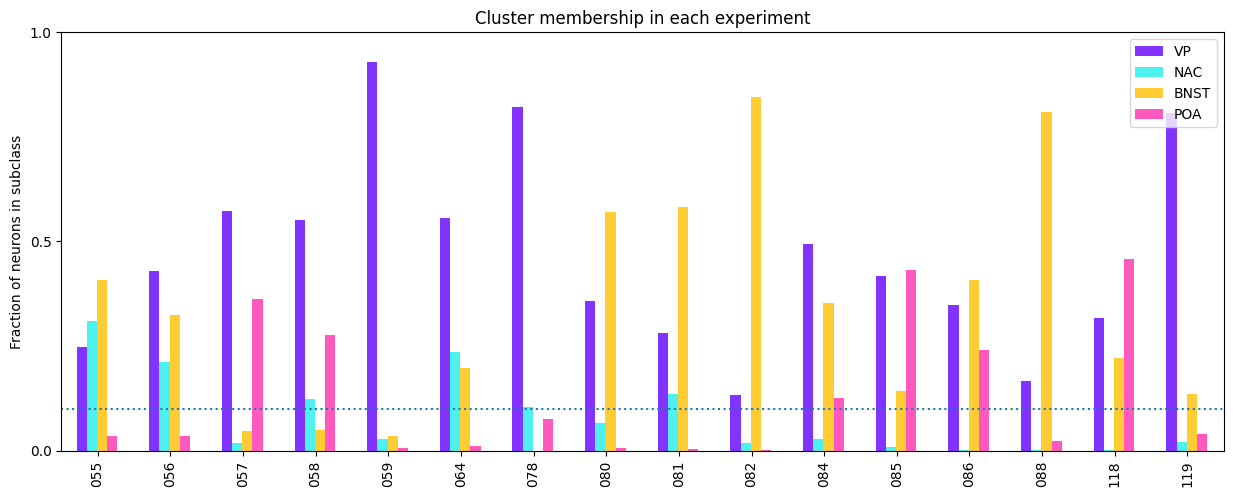

In [30]:
#plot normalized proportions across regions
rscolors = {'NAC':(0.3, 0.95, 0.94,1),'PAL':(0.8,0.8,0.8,1),'VP':(0.51, 0.2, 1, 1),'BNST':(1,0.8,0.2),'POA':(1,0.35,0.75)}
typecount=np.zeros((len(order),len(maingroups)))
totals=np.zeros(len(order))
for t in range(0,len(order)):
    totals[t]=np.sum(adata.obs['Region']==order[t])
    for g in range(0,len(maingroups)):   
        typecount[t,g]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass'].astype('U3')==maingroups[g]))    


tcn = np.divide(typecount.transpose(),totals).transpose()
tcn = np.divide(tcn,np.sum(tcn,axis=0))

plt.figure(figsize = (15,25))
ax = plt.subplot(4,1,1)
width = 0.14
bottom = np.zeros(len(maingroups))

for t in range(0,len(order)):
    p = ax.bar(np.arange(0,len(maingroups))+(width*(t-1)-0.08), tcn[t,:], width, label=order[t], bottom=bottom, color=rscolors[order[t]])

plt.plot((-0.5,len(maingroups)-0.5),(0.1,0.1),':','color','Black')

plt.title('Cluster membership in each experiment')
ax.legend(loc="upper right")
plt.xlim((-0.5,len(maingroups)-0.5))
plt.xticks(range(0,len(maingroups)),labels=maingroups,rotation=90)
plt.yticks(np.arange(0,3)/2,np.arange(0,3)/2)

plt.ylabel('Fraction of neurons in subclass')
plt.savefig(directory + '/Figures/expSubclassProps.svg')

## analyze only VP subclasses

In [129]:
adataSub = adata[adata.obs['subclass'].astype('U3').isin(maingroups)]

In [130]:
adataSub

View of AnnData object with n_obs × n_vars = 23123 × 10863
    obs: 'Sample', 'class', 'subclass', 'supertype', 'cluster', 'Experiment', 'Species', 'total_counts', 'Region'
    uns: 'neighbors', 'umap', 'Experiment_colors', 'subclass_colors', 'Region_colors'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [132]:
sc.pp.highly_variable_genes(adataSub, n_top_genes = 2000, subset = True, layer='counts', flavor = 'seurat_v3', batch_key='Sample')

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:148: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': 'seurat_v3'}


In [133]:
scvi.model.SCVI.setup_anndata(adataSub, layer = 'counts',
                             batch_key='Sample',
                             continuous_covariate_keys=['total_counts'],
                             categorical_covariate_keys=['Experiment','Species'])
model = scvi.model.SCVI(adataSub, n_layers=2, n_latent=30, gene_likelihood="nb")

In [134]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 346/346: 100%|█| 346/346 [13:52<00:00,  2.37s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=346` reached.


Epoch 346/346: 100%|█| 346/346 [13:52<00:00,  2.41s/it, v_num=1, train_loss_step


In [135]:
adataSub.obsm['X_scVI'] = model.get_latent_representation()

In [136]:
sc.pp.neighbors(adataSub, use_rep = 'X_scVI', method = 'umap', n_neighbors=15)

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


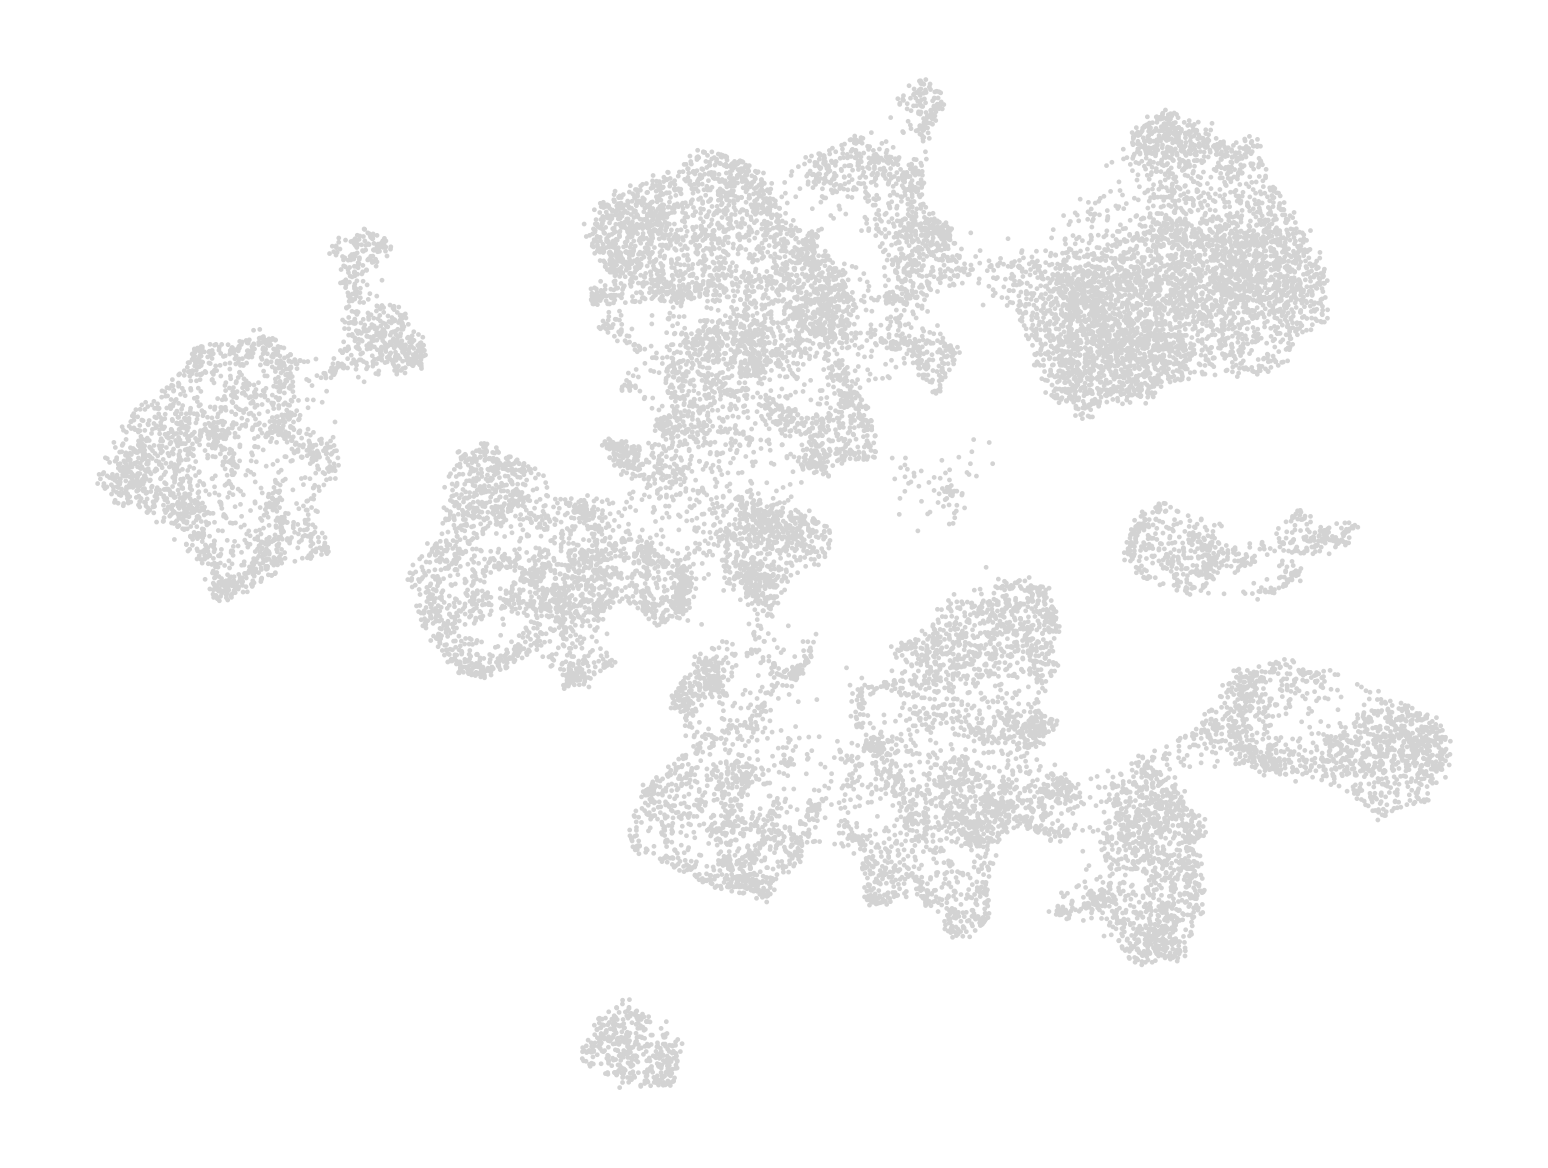

In [137]:
sc.tl.umap(adataSub, min_dist=0.5)
sc.pl.umap(adataSub, frameon = False)

In [283]:
adataSub.write_h5ad(directory + '/VPSubs.h5ad')

In [3]:
adataSub = sc.read_h5ad(directory + '/VPSubs.h5ad')

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


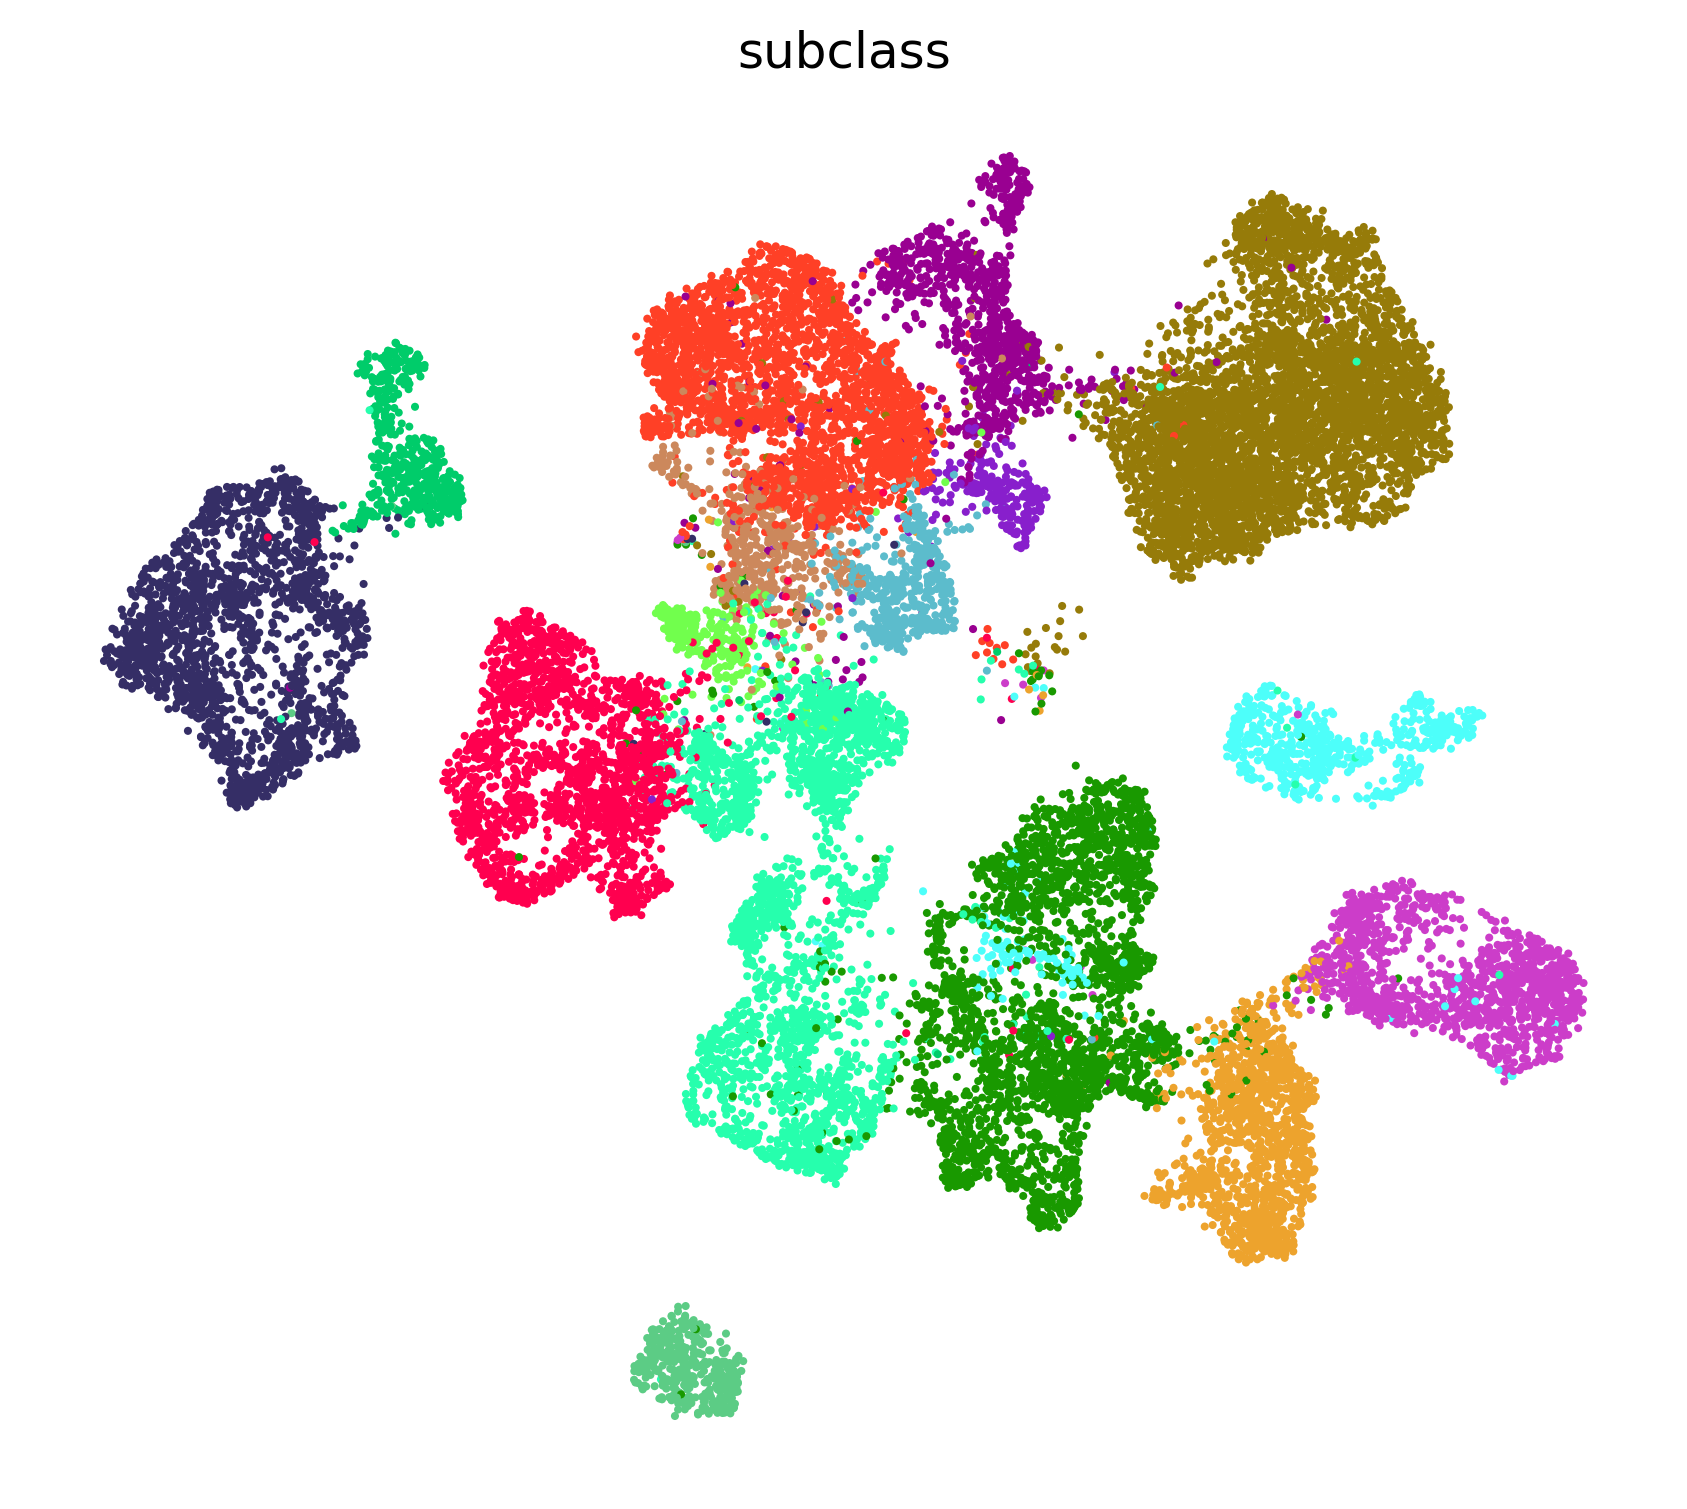

In [146]:
subclasses = np.unique(adataSub.obs['subclass'])
groups = subclasses[subclasses!='None']

plt.figure(figsize=(7,6))
ax=plt.subplot(1,1,1)
sc.pl.umap(adataSub, color = ['subclass'], groups = groups.tolist(), size = 15, frameon = False, palette=subclassp, ax=ax, show=False, legend_loc='off')
plt.savefig(directory + '/Figures/IntVPSubclass.png')

/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/david/opt/anaconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


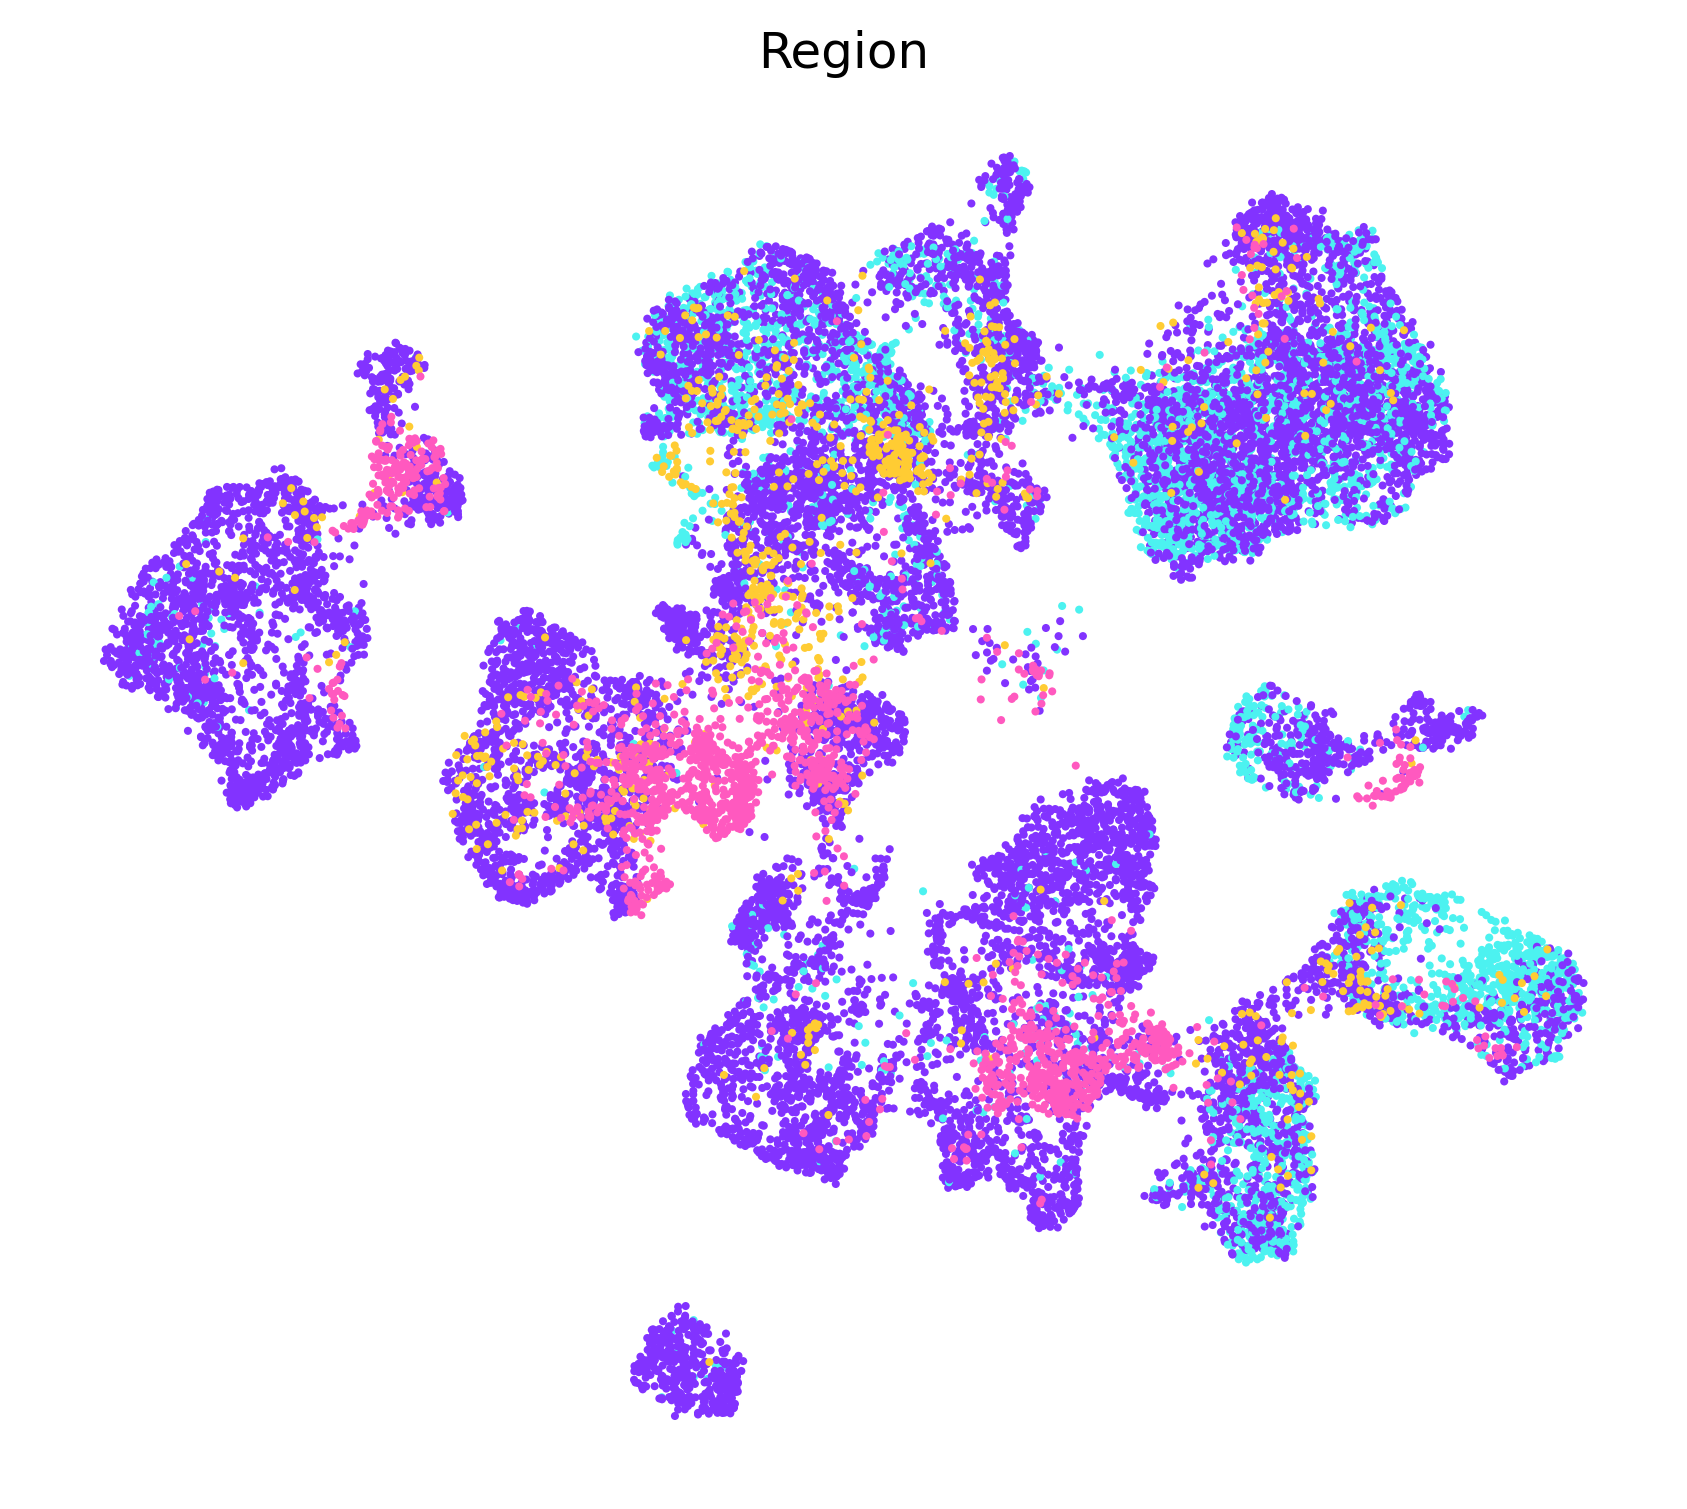

In [145]:
plt.figure(figsize=(7,6))
ax=plt.subplot(1,1,1)

rscolors = {'NAC':(0.3, 0.95, 0.94,1),'PAL':(0.8,0.8,0.8,1),'VP':(0.51, 0.2, 1, 1),'BNST':(1,0.8,0.2),'POA':(1,0.35,0.75)}

sc.pl.umap(adataSub, color = ['Region'], size = 15, frameon = False, palette=rscolors, legend_loc='None', ax=ax, show=False)
plt.savefig(directory + '/Figures/IntVPReg.png')

## VP analysis accounting for NAc

In [174]:
#get estimated distributions for VP after subtracting out STRv
strvscs = ['054','060','061','062','063']
STRvRatio = (np.sum(adata[adata.obs['Region']=='VP'].obs['subclass'].astype('U3').isin(strvscs))/np.sum(adata.obs['Region']=='VP')) / (np.sum(adata[adata.obs['Region']=='NAC'].obs['subclass'].astype('U3').isin(strvscs))/np.sum(adata.obs['Region']=='NAC'))

In [206]:
#subclasses
maingroups = [
          '055','056','057','058','059',
          '064','078','080','081','082',
          '084','085','086','088','118','119'
         ]
order = ['VP','NAC']
typecount=np.zeros((len(order),len(maingroups)))
totals=np.zeros(len(order))
for t in range(0,len(order)):
    totals[t]=np.sum(adata.obs['Region']==order[t])
    for g in range(0,len(maingroups)):   
        typecount[t,g]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass'].astype('U3')==maingroups[g]))    

tcn = np.divide(typecount.transpose(),totals).transpose()
SCest = tcn[0,:]-STRvRatio*tcn[1,:]
SCest = SCest / np.sum(SCest)

In [216]:
SCest

array([0.01549384, 0.04240752, 0.14384514, 0.03045606, 0.025169  ,
       0.16716258, 0.02626764, 0.04669714, 0.08734878, 0.01873764,
       0.01344656, 0.12252851, 0.10220341, 0.01320685, 0.02248247,
       0.12254688])

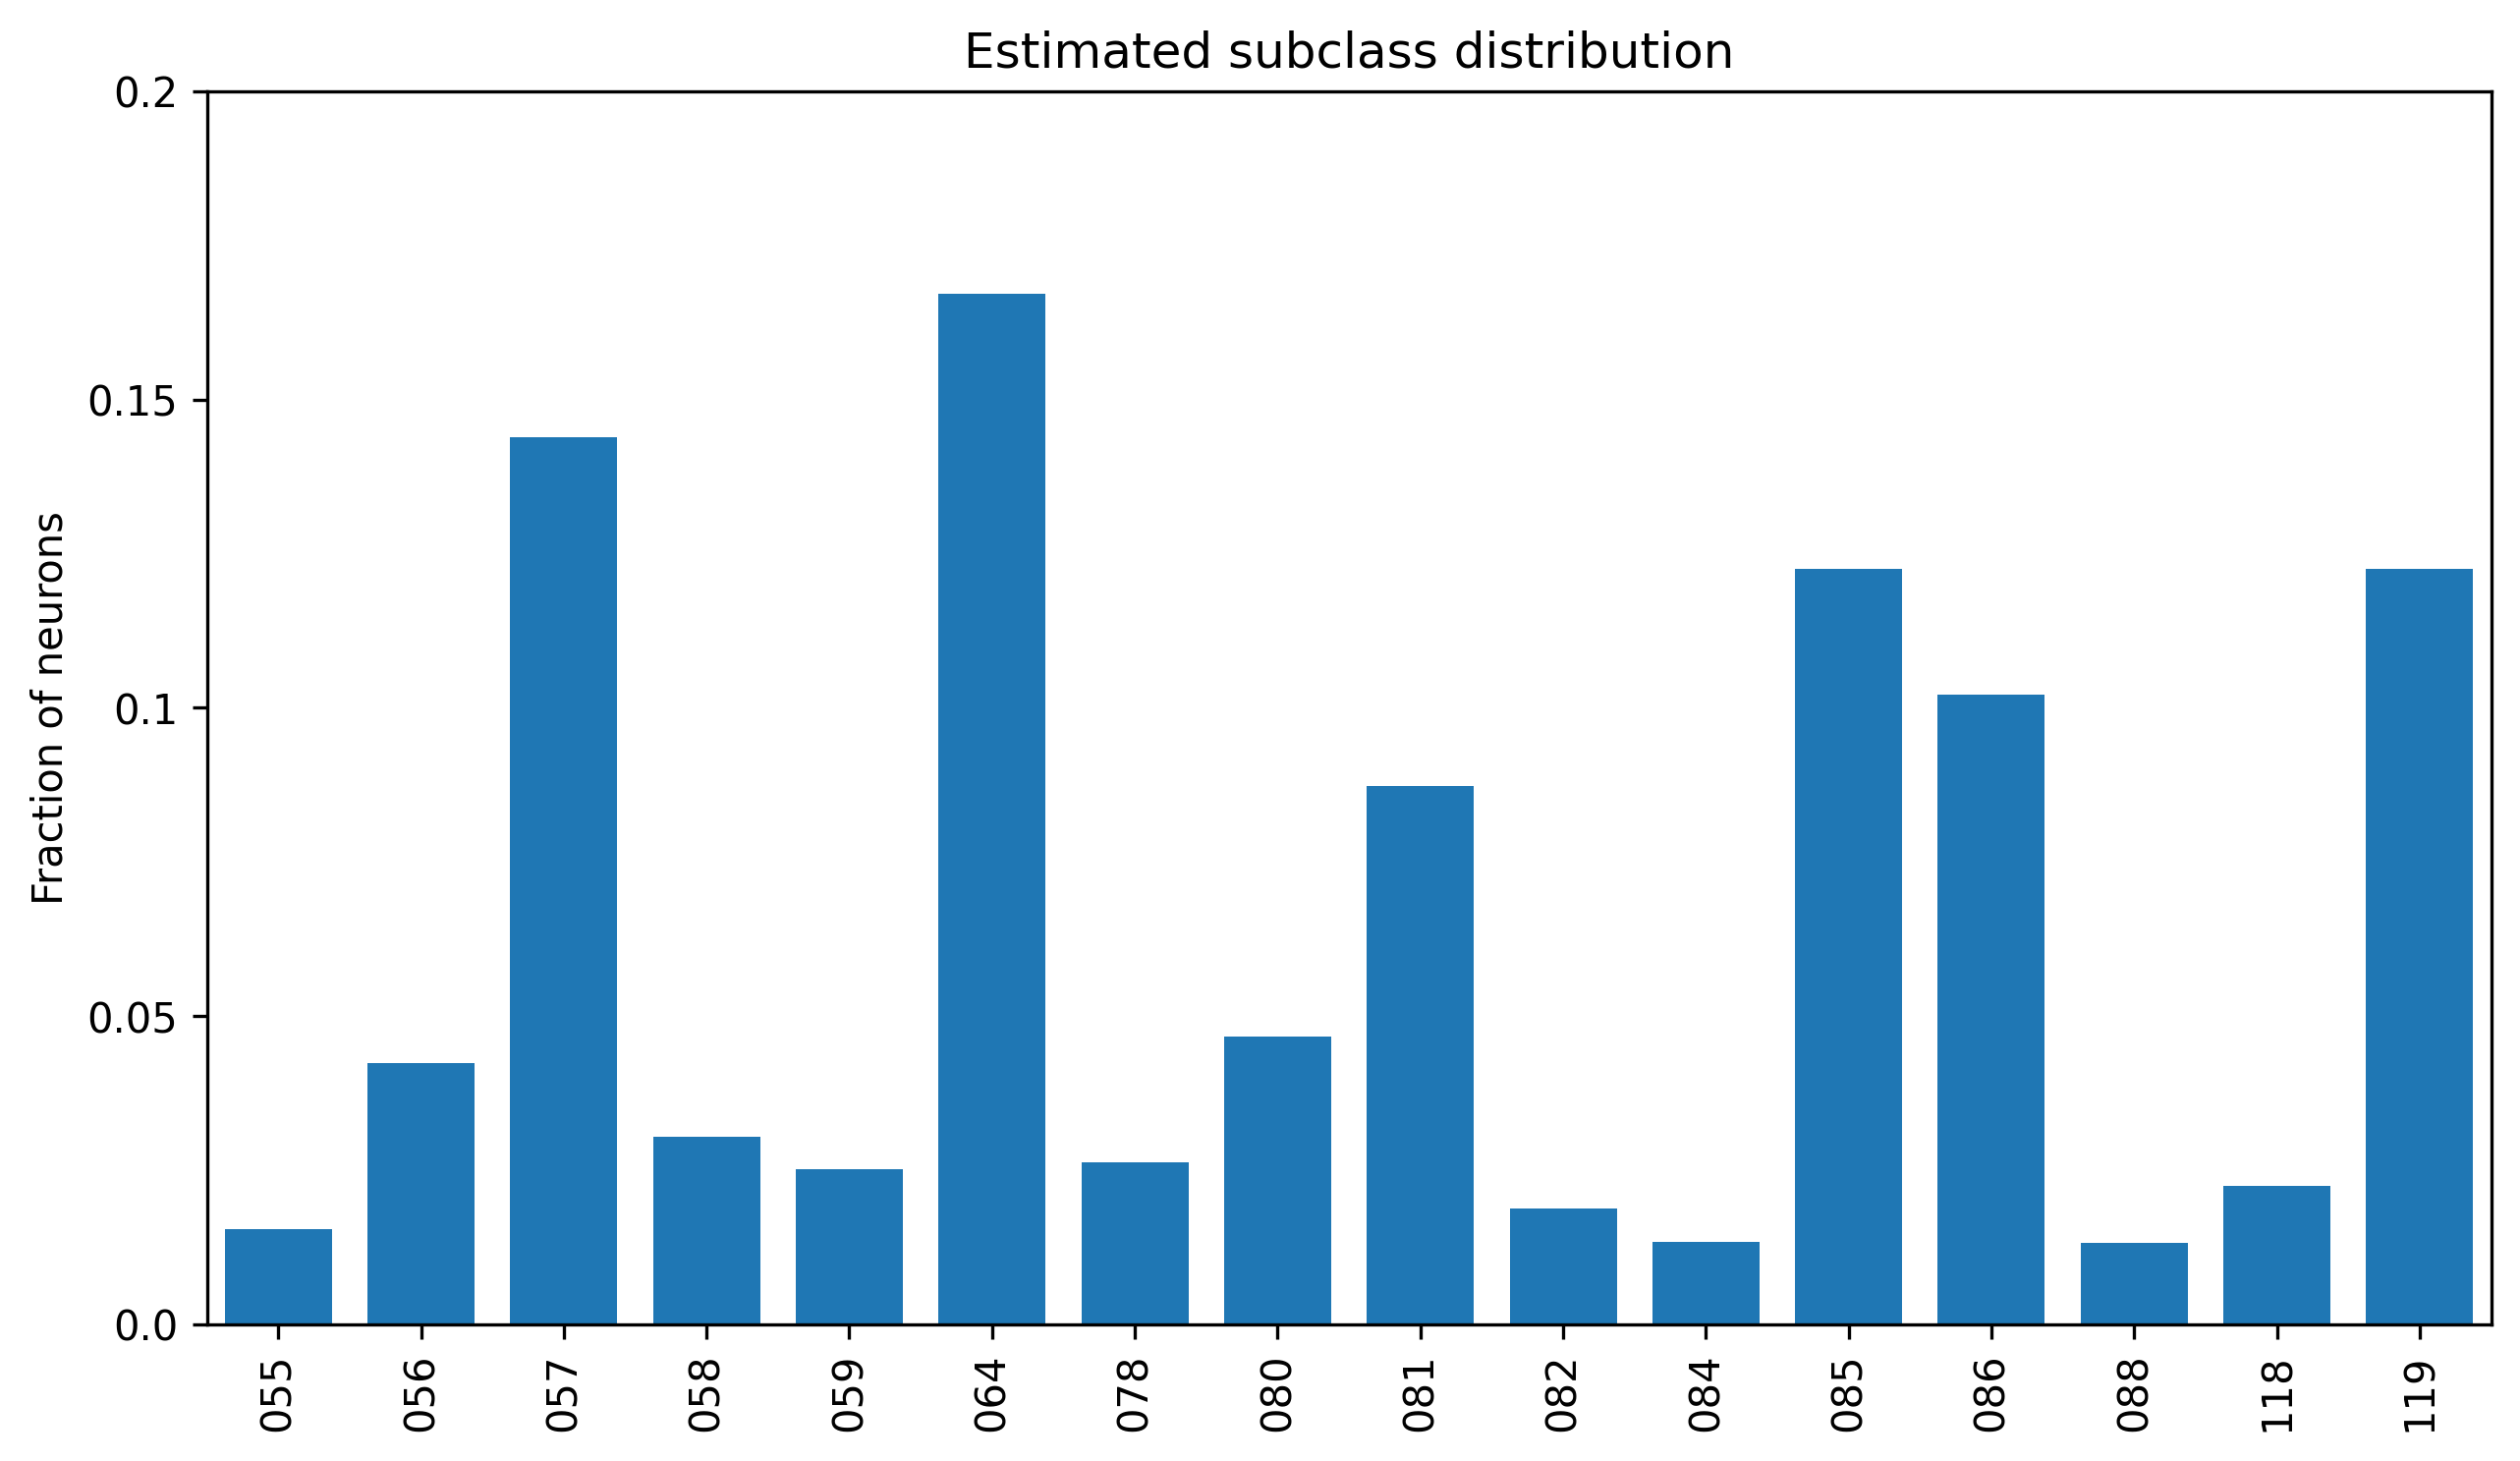

In [207]:
plt.figure(figsize = (10,25))
ax = plt.subplot(4,1,1)
width = 0.75
bottom = np.zeros(len(maingroups))
p = ax.bar(np.arange(0,len(maingroups)), SCest, width, bottom=bottom)
plt.title('Estimated subclass distribution')
plt.xlim((-0.5,len(maingroups)-0.5))
plt.xticks(range(0,len(maingroups)),labels=maingroups,rotation=90)
plt.yticks(np.arange(0,5)/20,np.arange(0,5)/20)
plt.ylabel('Fraction of neurons')
plt.savefig(directory + '/Figures/VPSubclassEst.svg')

In [195]:
#get NT info
allMeta = pd.read_csv('/Users/david/Dropbox/RNASeq/AllenPAL/Data/cell_metadata_with_cluster_annotation.csv')

(sts,ci) = np.unique(allMeta['supertype'].to_numpy(),return_index=True)
nt = allMeta['neurotransmitter'].to_numpy()[ci]
nt[nt!=nt]='None'
stnt = dict(zip(sts,nt))
adata.obs['neurotransmitter'] = adata.obs.supertype.map(stnt)

del allMeta

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_68617/2203369050.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  allMeta = pd.read_csv('/Users/david/Dropbox/RNASeq/AllenPAL/Data/cell_metadata_with_cluster_annotation.csv')


In [208]:
#neurotransmitter
mainnt = [
          'GABA','Glut','Chol','Glut-GABA'
         ]
order = ['VP','NAC']
typecount=np.zeros((len(order),len(mainnt)))
totals=np.zeros(len(order))
for t in range(0,len(order)):
    totals[t]=np.sum(adata.obs['Region']==order[t])
    for g in range(0,len(mainnt)):   
        typecount[t,g]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass'].astype('U3').isin(maingroups)) & (adata.obs['neurotransmitter']==mainnt[g]))    

tcn = np.divide(typecount.transpose(),totals).transpose()
NTest = tcn[0,:]-STRvRatio*tcn[1,:]
NTest = NTest / np.sum(NTest)

In [215]:
NTest

array([0.81231719, 0.14502934, 0.02424155, 0.01841192])

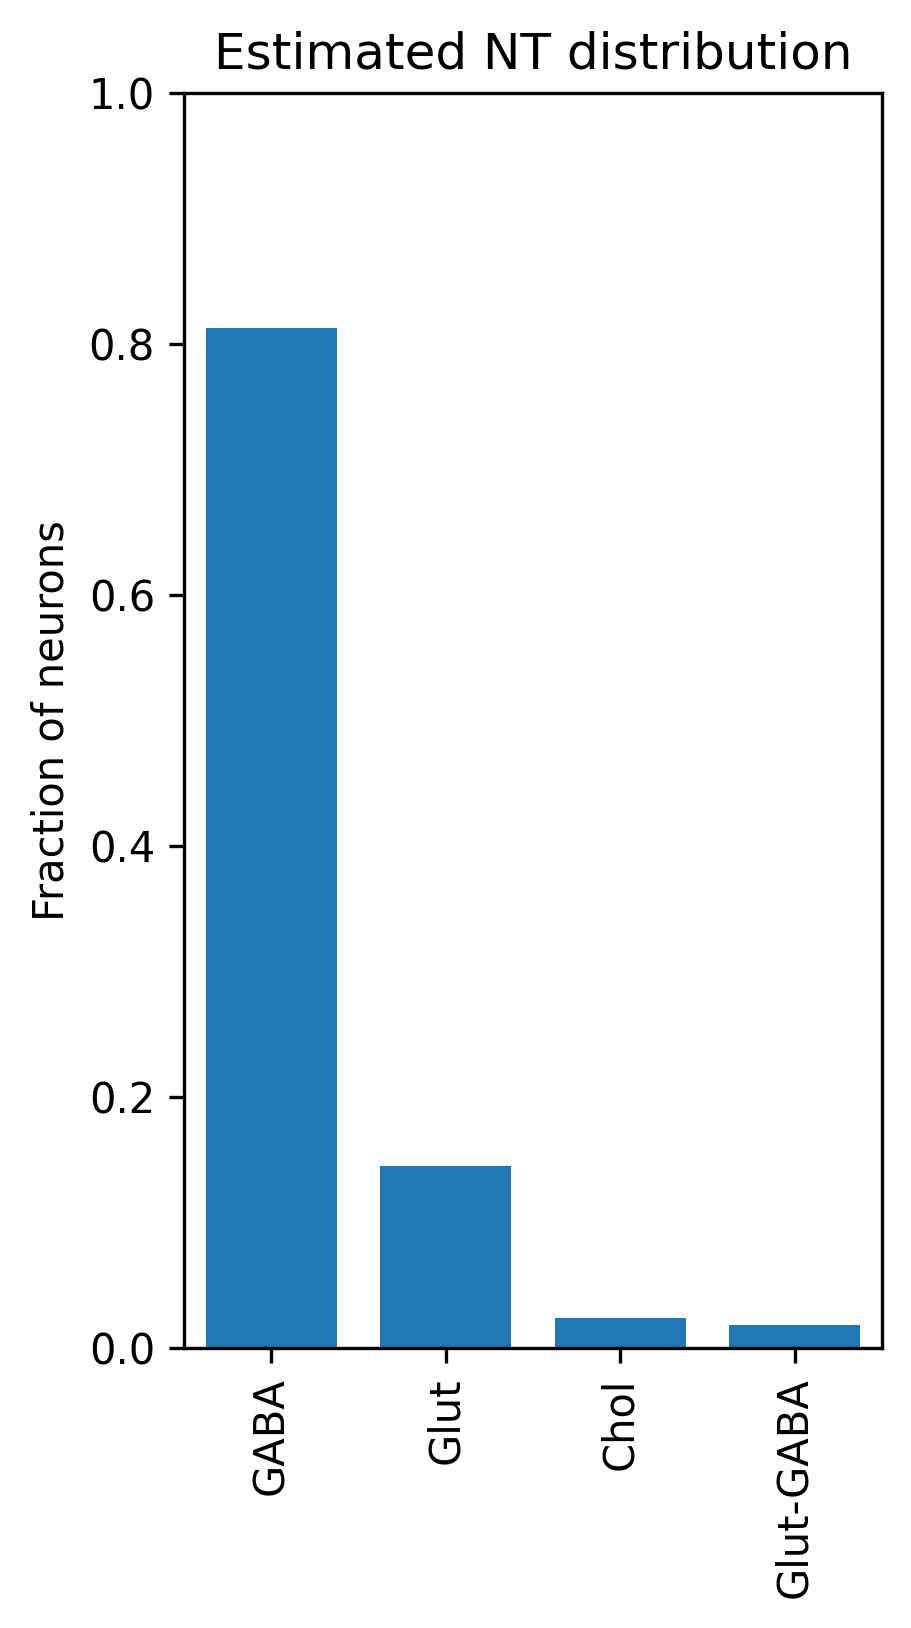

In [214]:
plt.figure(figsize = (3,25))
ax = plt.subplot(4,1,1)
width = 0.75
bottom = np.zeros(len(mainnt))
p = ax.bar(np.arange(0,len(mainnt)), NTest, width, bottom=bottom)
plt.title('Estimated NT distribution')
plt.xlim((-0.5,len(mainnt)-0.5))
plt.xticks(range(0,len(mainnt)),labels=mainnt,rotation=90)
plt.yticks(np.arange(0,6)/5,np.arange(0,6)/5)
plt.ylabel('Fraction of neurons')
plt.savefig(directory + '/Figures/VPNTEst.svg')

In [217]:
#neurotransmitter
mainc = [
          '08','09','11','13'
         ]
order = ['VP','NAC']
typecount=np.zeros((len(order),len(mainc)))
totals=np.zeros(len(order))
for t in range(0,len(order)):
    totals[t]=np.sum(adata.obs['Region']==order[t])
    for g in range(0,len(mainnt)):   
        typecount[t,g]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass'].astype('U3').isin(maingroups)) & (adata.obs['class'].astype('U2')==mainc[g]))    

tcn = np.divide(typecount.transpose(),totals).transpose()
Cest = tcn[0,:]-STRvRatio*tcn[1,:]
Cest = Cest / np.sum(Cest)

In [218]:
Cest

array([0.23220256, 0.19233158, 0.43043652, 0.14502934])

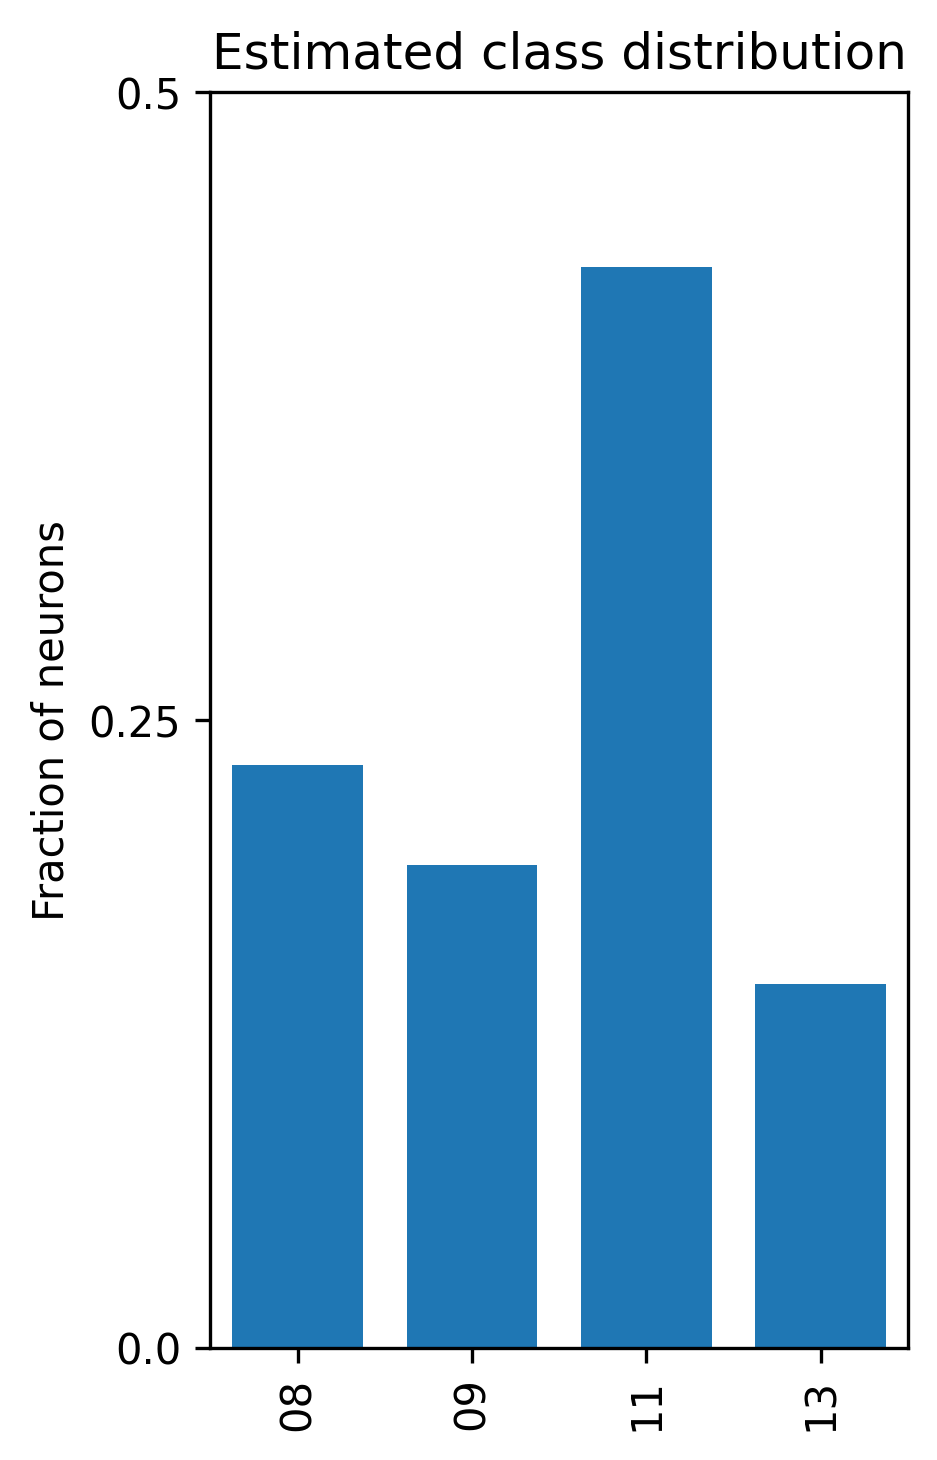

In [221]:
plt.figure(figsize = (3,25))
ax = plt.subplot(4,1,1)
width = 0.75
bottom = np.zeros(len(mainc))
p = ax.bar(np.arange(0,len(mainc)), Cest, width, bottom=bottom)
plt.title('Estimated class distribution')
plt.xlim((-0.5,len(mainc)-0.5))
plt.xticks(range(0,len(mainc)),labels=mainc,rotation=90)
plt.yticks(np.arange(0,3)/4,np.arange(0,3)/4)
plt.ylabel('Fraction of neurons')
plt.savefig(directory + '/Figures/VPCEst.svg')

## comparison between MapMyCells and custom clustering method

In [5]:
adataint = sc.read_h5ad('/Users/david/Dropbox/RNASeq/Rat/NAcVPInt.h5ad')

In [6]:
#subclass assignment from clustering with PAL data
adata.obs['subclass_c']=adataint.obs['subclass']

In [7]:
del(adataint)

In [8]:
adata.obs['Reg-Spec']='Other'
adata.obs['Reg-Spec'][adata.obs['Experiment']=='NAC']='NAC-M'
adata.obs['Reg-Spec'][adata.obs['Experiment']=='VP']='VP-M'
adata.obs['Reg-Spec'][(adata.obs['Experiment']=='Rat') & (adata.obs['Sample'].isin(['Rat:N1','Rat:N2']))]='NAC-R'
adata.obs['Reg-Spec'][(adata.obs['Experiment']=='Rat') & (adata.obs['Sample'].isin(['Rat:V1','Rat:V2']))]='VP-R'

/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_55465/3924184967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['Reg-Spec'][adata.obs['Experiment']=='NAC']='NAC-M'
/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_55465/3924184967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['Reg-Spec'][adata.obs['Experiment']=='VP']='VP-M'
/var/folders/0d/m1rp2vsn40550y2btkrfwptr0000gn/T/ipykernel_55465/3924184967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [9]:
#custom region order
maingroups = ['054','060','061','062','063',
          '055','056','058','064','081',
          '057','059','078','080','082',
          '084','085','086','088',
          '118','119'
         ]

extra = np.unique(adata.obs['subclass'].astype('U3'))
extra = extra[~np.isin(extra,maingroups)]
groups = np.concatenate((maingroups,extra))
grouporder = np.argsort(np.argsort(groups))
groups = np.sort(groups)

#numerical order
grouporder = np.arange(len(np.unique(adata.obs['subclass'].astype('U3'))))
groupnames = np.unique(adata.obs['subclass'])
groupnames = groupnames[grouporder]

Text(0, 0.5, 'Fraction of cells')

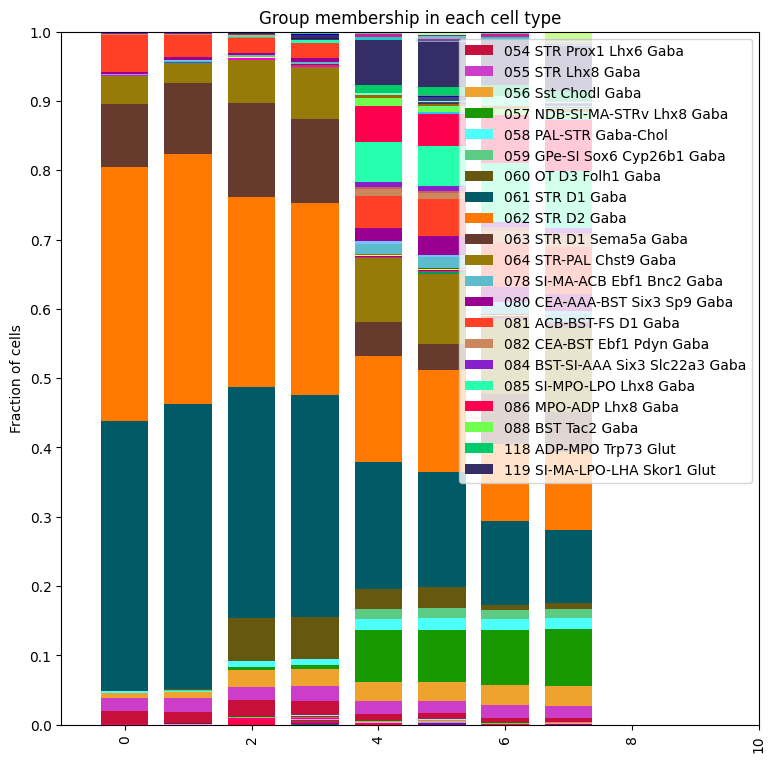

In [12]:
order = ['NAC-M','NAC-R','VP-M','VP-R']
typecount=np.zeros((len(groups),len(order)))
for g in range(0,len(groups)):   
    for t in range(0,len(order)):
        typecount[g,t]=np.sum((adata.obs['Reg-Spec']==order[t]) & (adata.obs['subclass']==groupnames[g]))                   
        
tcn1 = np.divide(typecount,np.sum(typecount,axis=0))

typecount=np.zeros((len(groups),len(order)))
for g in range(0,len(groups)):   
    for t in range(0,len(order)):
        typecount[g,t]=np.sum((adata.obs['Reg-Spec']==order[t]) & (adata.obs['subclass_c']==groupnames[g]))                   
        
tcn2 = np.divide(typecount,np.sum(typecount,axis=0))

tcn = np.concatenate((tcn1,tcn2),axis=1)
tcn[:,(0,2,4,6)] = tcn2
tcn[:,(1,3,5,7)] = tcn1

width = 0.75

fig, ax = plt.subplots(figsize = (9,9))
bottom = np.zeros(len(order)*2)

lhs=[]
inc=np.full((len(groups),1),False,dtype='bool')
inccolors=[]
for g in range(0,len(groups)):
    p = ax.bar(range(0,8), tcn[g,:], width, label=groupnames[g], bottom=bottom, color=subclassp[groupnames[g]])
    bottom += tcn[g,:]
    if np.isin(groups[g],maingroups):
        lhs.append(p)
        inc[g]=True
        inccolors.append(subclassp[groupnames[g]])
inc=inc.squeeze()

ax.legend(handles=lhs,loc="upper right", ncols=1)

plt.title('Group membership in each cell type')
plt.xlim((-1,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Fraction of cells')
#plt.savefig(directory + '/Figures/expSubclass.svg')

In [15]:
scCorr[0][4,5]

0.9831168831168832

In [16]:
scCorr[1][4,5]

1.7747675695140669e-15

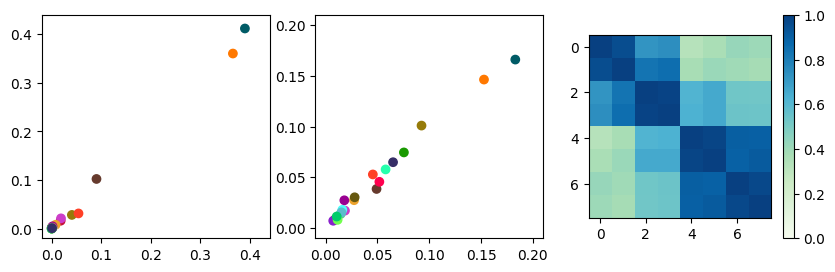

In [14]:
colororder=[]
for x in range(0,len(groupnames)):
    colororder.append(subclassp[groupnames[x]])

plt.figure(figsize=(10,2.9))
plt.subplot(1,3,1)
plt.scatter(tcn[inc,0],tcn[inc,1],c=inccolors)
plt.xlim((-0.02,0.44))
plt.ylim((-0.02,0.44))

plt.subplot(1,3,2)
plt.scatter(tcn[inc,4],tcn[inc,5],c=inccolors)
plt.xlim((-0.01,0.21))
plt.ylim((-0.01,0.21))

plt.subplot(1,3,3)
#scCorr = np.corrcoef(tcn[inc,:],y=None,rowvar=False)
scCorr = scipy.stats.spearmanr(tcn[inc,:],axis=0)
plt.imshow(scCorr[0],vmin=0,vmax=1,cmap='GnBu')
plt.colorbar()
plt.savefig(directory + '/Figures/intComp.svg')

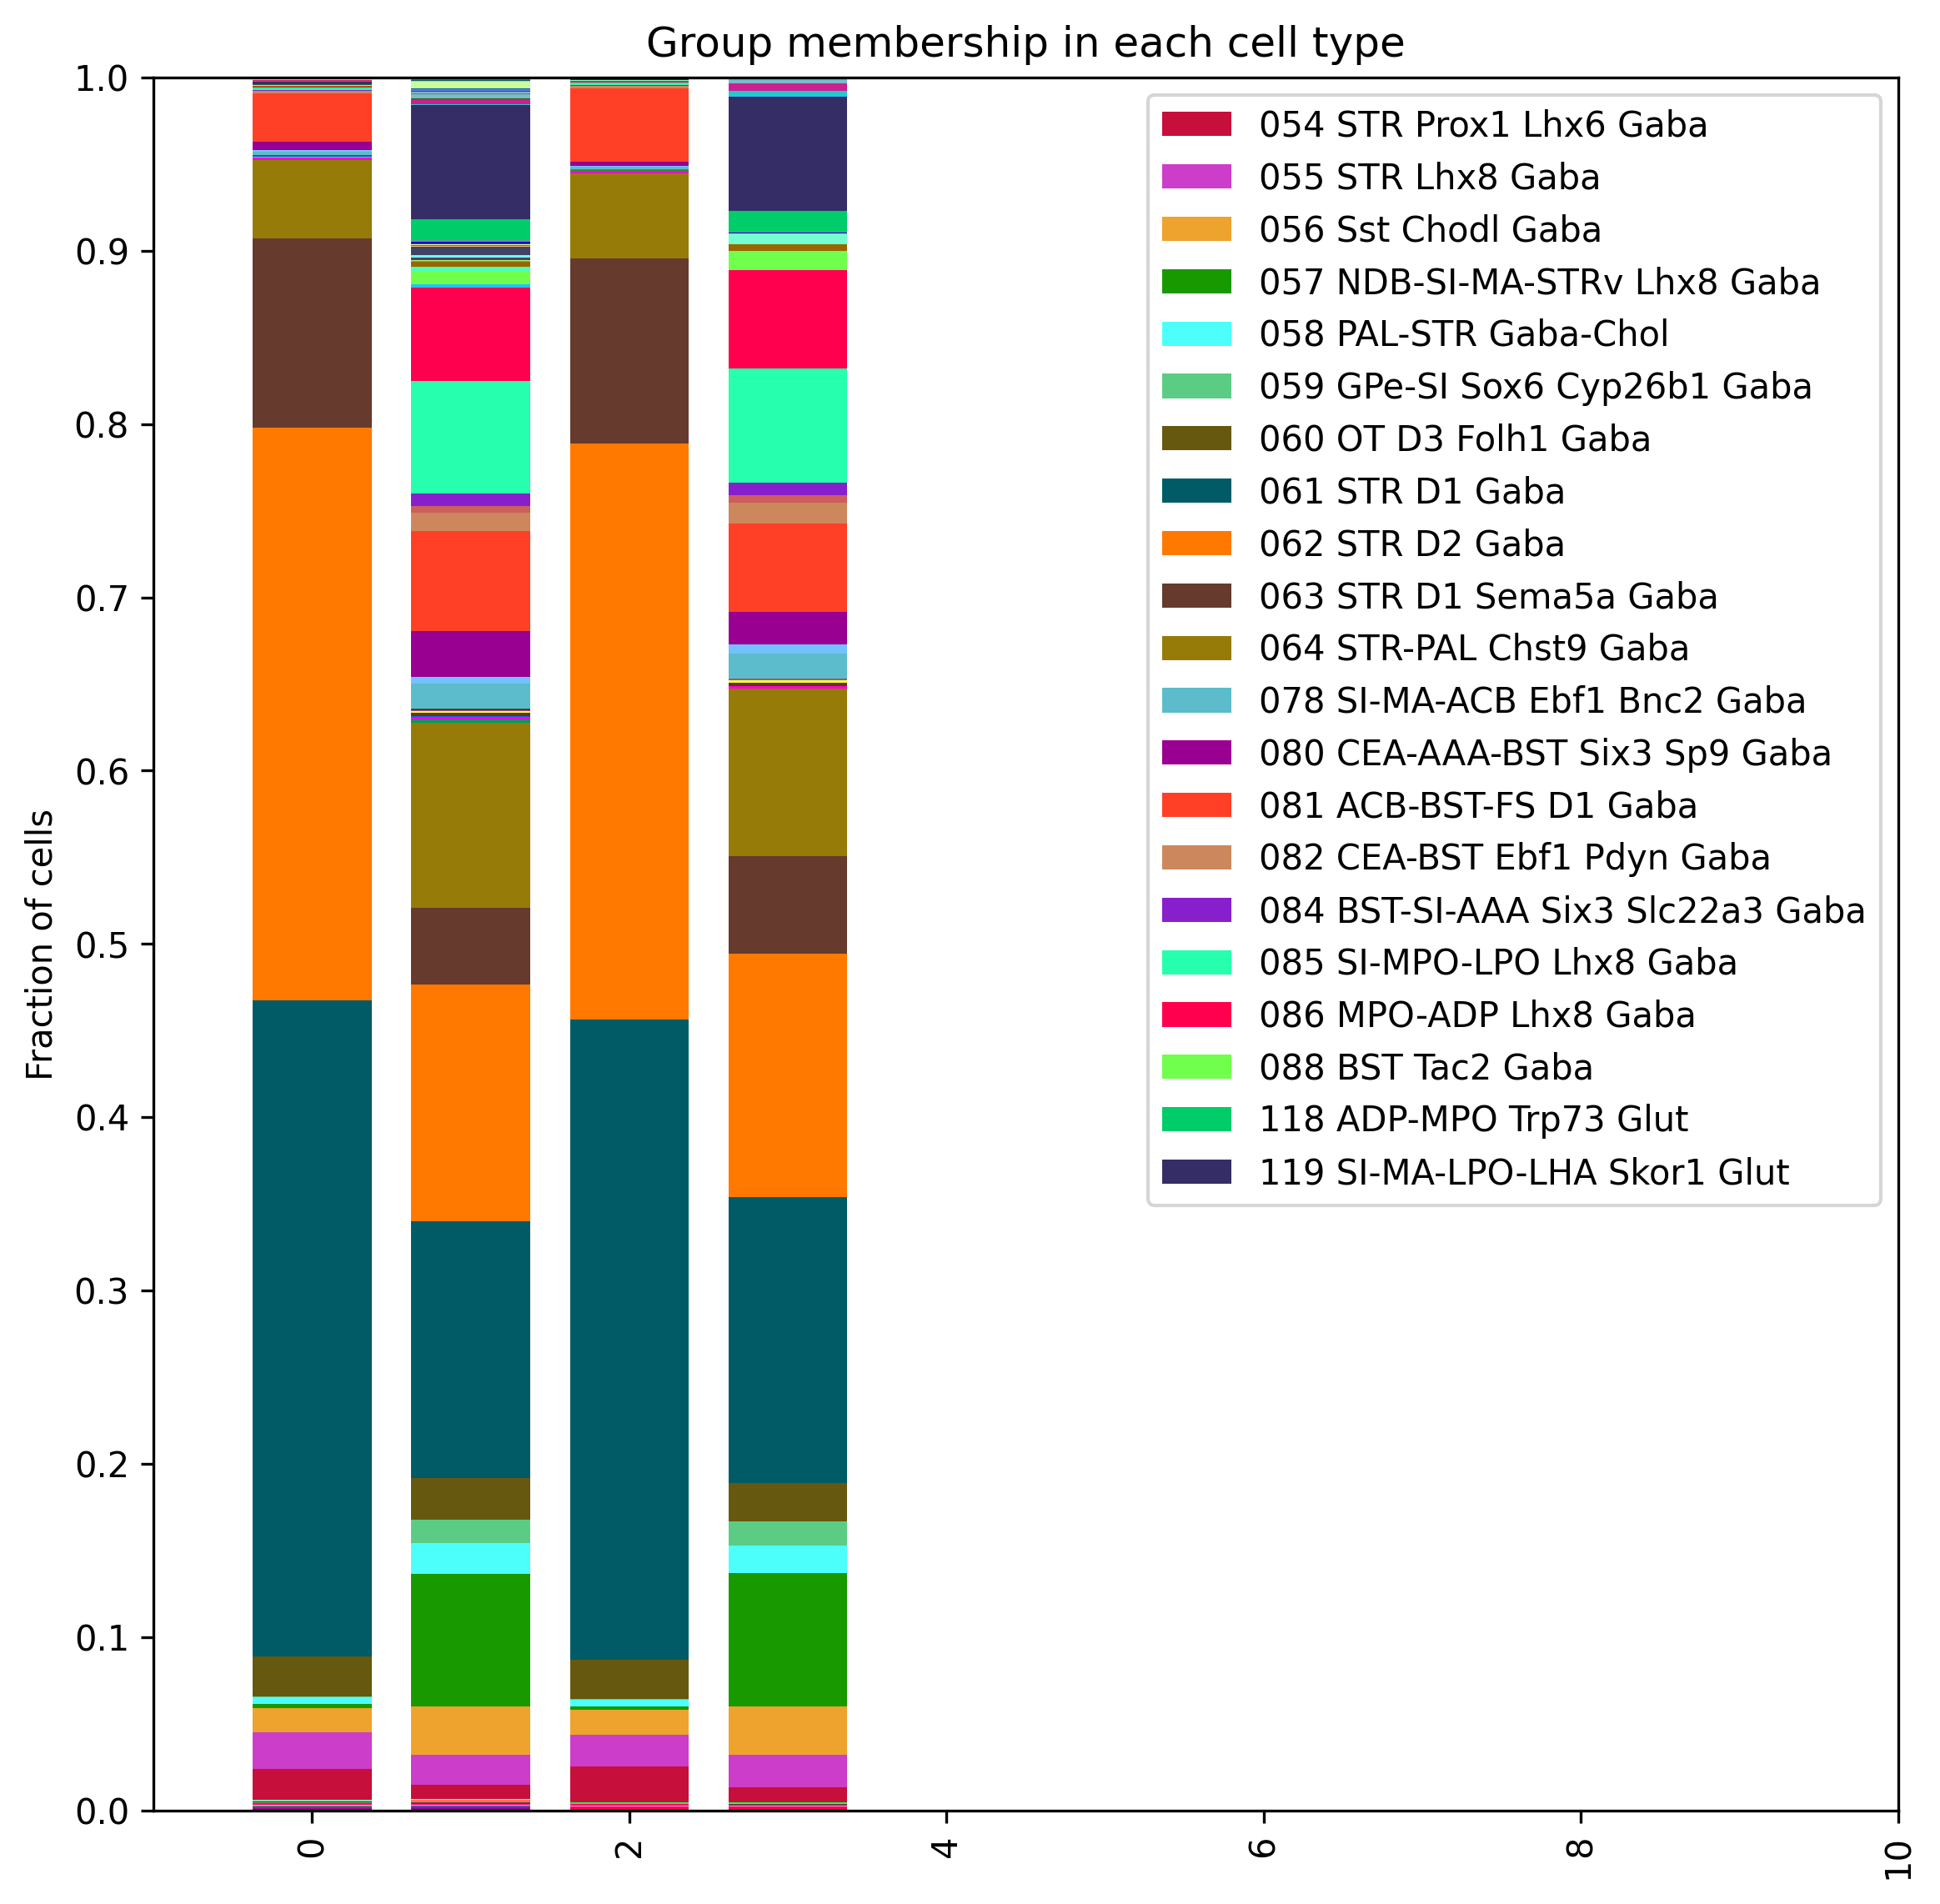

In [281]:
order = ['NAC','VP']
typecount=np.zeros((len(groups),len(order)))
for g in range(0,len(groups)):   
    for t in range(0,len(order)):
        typecount[g,t]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass']==groupnames[g]))                   
        
tcn1 = np.divide(typecount,np.sum(typecount,axis=0))

typecount=np.zeros((len(groups),len(order)))
for g in range(0,len(groups)):   
    for t in range(0,len(order)):
        typecount[g,t]=np.sum((adata.obs['Region']==order[t]) & (adata.obs['subclass_c']==groupnames[g]))                   
        
tcn2 = np.divide(typecount,np.sum(typecount,axis=0))

tcn = np.concatenate((tcn1,tcn2),axis=1)

width = 0.75

fig, ax = plt.subplots(figsize = (9,9))
bottom = np.zeros(len(order)*2)

lhs=[]
inc=np.full((len(groups),1),False,dtype='bool')
inccolors=[]
for g in range(0,len(groups)):
    p = ax.bar(range(0,4), tcn[g,:], width, label=groupnames[g], bottom=bottom, color=subclassp[groupnames[g]])
    bottom += tcn[g,:]
    if np.isin(groups[g],maingroups):
        lhs.append(p)
        inc[g]=True
        inccolors.append(subclassp[groupnames[g]])
inc=inc.squeeze()

ax.legend(handles=lhs,loc="upper right", ncols=1)

plt.title('Group membership in each cell type')
plt.xlim((-1,10))
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Fraction of cells')
plt.savefig(directory + '/Figures/intMethodComp.svg')